# CONSULTAS Y CONCLUSIONES PROYECTO 3

## 1. Importacion de Librerias y Lectura del fichero

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputaci√≥n de nulos usando m√©todos avanzados estad√≠sticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librer√≠as de visualizaci√≥n
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas

In [2]:
df = pd.read_csv("HR RAW DATA CLEAN.csv")

## 2. ANALISIS CORRELACION DE VARIABLES CATEG√ìRICAS Y NUM√âRICAS

In [3]:
variables_numericas=df.select_dtypes(include= 'number')
variables_numericas.columns

Index(['Age', 'Daily_Rate', 'Distance_From_Home', 'Environment_Satisfaction',
       'Hourly_Rate', 'Job_Satisfaction', 'Monthly_Income', 'Monthly_Rate',
       'Num_Companies_Worked', 'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Total_Working_Years',
       'Training_Times_Last_Year', 'Work_Life_Balance', 'Years_At_Company',
       'Years_Since_Last_Promotion', 'Years_Current_Manager', 'Date_Birth',
       'Annual_Income'],
      dtype='object')

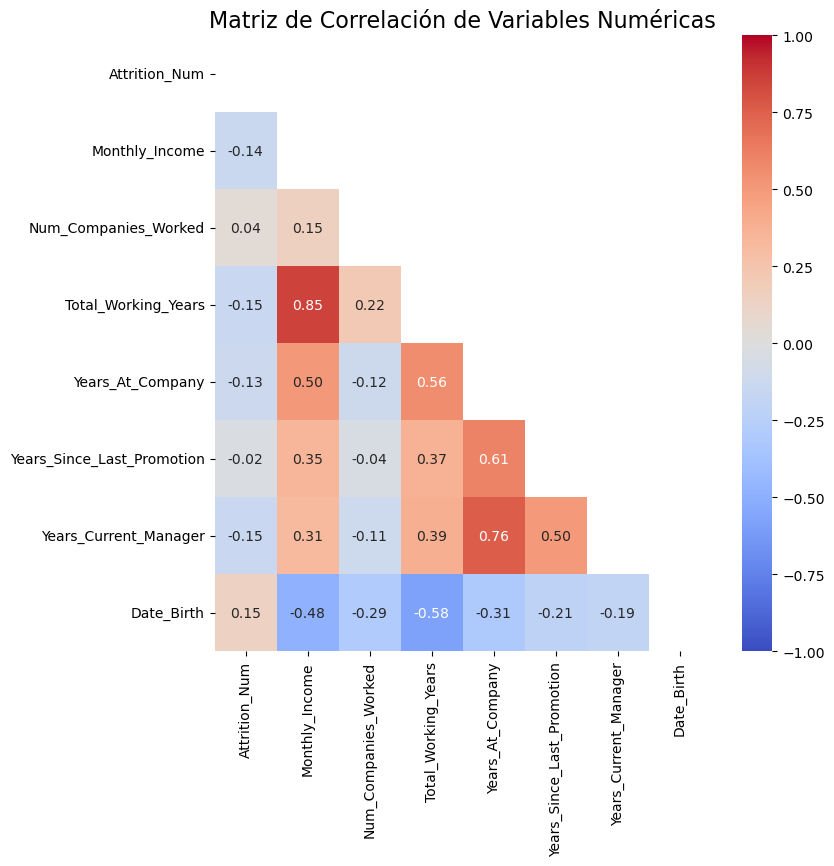

In [4]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA M√ÅS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACI√ìN

#variables_numericas = df.select_dtypes(include=[np.number])

df['Attrition_Num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

variables_correlacion= df[['Attrition_Num','Monthly_Income','Num_Companies_Worked','Total_Working_Years', 'Years_At_Company','Years_Since_Last_Promotion', 'Years_Current_Manager', 'Date_Birth']].columns

matriz_correlacion = df[variables_correlacion].corr()

# establecemos el tama√±o de la gr√°fica
plt.figure(figsize = (8, 8))

# creamos una matriz booleana de m√°scara
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# creamos un heatmap con la m√°scara
sns.heatmap(matriz_correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap='coolwarm', 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 
plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas", fontsize=16)
plt.show()

In [5]:
variables_categoricas = df.select_dtypes(include= 'object').columns

In [6]:
from scipy.stats import chi2_contingency

for var in variables_categoricas:
    tabla = pd.crosstab(df[var], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{var}: p-valor = {p:.4f}")

Attrition: p-valor = 0.0000
Business_Travel: p-valor = 0.0598
Education: p-valor = 0.4306
Education_Field: p-valor = 0.2952
Employee_Number: p-valor = 0.0180
Gender: p-valor = 0.3404
Job_Involvement: p-valor = 0.0000
Job_Level: p-valor = 0.0000
Job_Role: p-valor = 0.0000
Marital_Status: p-valor = 0.0000
Over_Time: p-valor = 0.0000
Standard_Hours: p-valor = 0.9649
Stock_Option_Level: p-valor = 0.0000
Remote_Work: p-valor = 0.4320
Environment_Sat_Cat: p-valor = 0.0000
Job_Sat_Cat: p-valor = 0.0009
Relationship_Sat_Cat: p-valor = 0.1332
Performance_Rat_Cat: p-valor = 0.8710
Work_Balance_Cat: p-valor = 0.0037


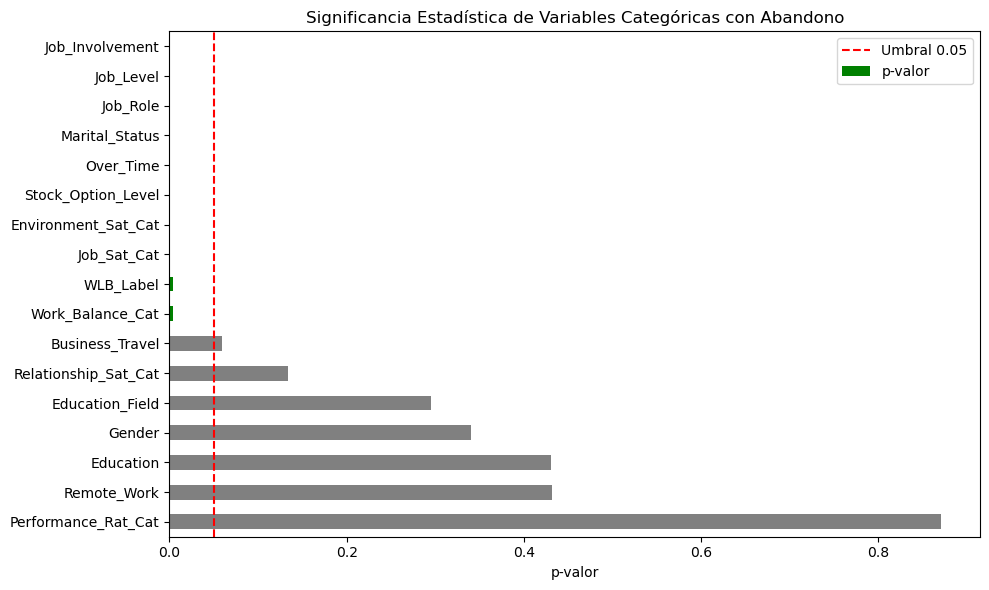

In [7]:
# Crear gr√°fico de barras con p-valores
import matplotlib.pyplot as plt

# Suponiendo que tienes este diccionario:
pvalores = {
    'Job_Involvement': 0.0000,
    'Job_Level': 0.0000,
    'Job_Role': 0.0000,
    'Marital_Status': 0.0000,
    'Over_Time': 0.0000,
    'Stock_Option_Level': 0.0000,
    'Environment_Sat_Cat': 0.0000,
    'Job_Sat_Cat': 0.0009,
    'Work_Balance_Cat': 0.0037,
    'WLB_Label': 0.0037,
    'Business_Travel': 0.0598,
    'Education': 0.4306,
    'Education_Field': 0.2952,
    'Gender': 0.3404,
    'Remote_Work': 0.4320,
    'Relationship_Sat_Cat': 0.1332,
    'Performance_Rat_Cat': 0.8710
}

# Convertir a DataFrame ordenado
import pandas as pd
df_pval = pd.DataFrame.from_dict(pvalores, orient='index', columns=['p-valor']).sort_values(by='p-valor')

# Colorear seg√∫n significancia
colors = df_pval['p-valor'].apply(lambda x: 'green' if x < 0.05 else 'gray')

# Graficar
plt.figure(figsize=(10, 6))
df_pval['p-valor'].plot(kind='barh', color=colors)
plt.axvline(0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.xlabel('p-valor')
plt.title('Significancia Estad√≠stica de Variables Categ√≥ricas con Abandono')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


El p-valor indica la probabilidad de obtener los resultados observados si las variables fueran independientes (es decir, si no hay relaci√≥n entre ellas).

Si p < 0.05 ‚Üí hay evidencia estad√≠stica de que la variable s√≠ est√° relacionada con el abandono.

Si p ‚â• 0.05 ‚Üí no hay evidencia suficiente para afirmar que esa variable tenga relaci√≥n con el abandono.

## 3. LOS PERFILES DEL ABANDONO

* üéØ Edad, experiencia y nivel jer√°rquico.
* üìä Gr√°ficos: Histogramas y diagramas de dispersi√≥n (edad vs. abandono, a√±os en la empresa vs. abandono).

`Edad`

In [8]:
total_yes = df['Attrition'].value_counts()['Yes']
print(f"Total de personas que abandonaron: {total_yes}")

Total de personas que abandonaron: 252


In [9]:
# Por edad:
abandono_por_edad = df.groupby(['Age', 'Attrition']).size().unstack().fillna(0)['Yes']
abandono_por_edad

Age
18     4.0
19     6.0
20     6.0
21     7.0
22     5.0
23     4.0
24     7.0
25     6.0
26    13.0
27     3.0
28    15.0
29    19.0
30     9.0
31    19.0
32    11.0
33    13.0
34    10.0
35    11.0
36     6.0
37     6.0
38     2.0
39     6.0
40     5.0
41     8.0
42     2.0
43     2.0
44     6.0
45     2.0
46     6.0
47     4.0
48     2.0
49     2.0
50     5.0
51     2.0
52     4.0
53     2.0
54     0.0
55     4.0
56     3.0
57     0.0
58     5.0
59     0.0
60     0.0
Name: Yes, dtype: float64

In [10]:
# Funci√≥n para clasificar generaciones seg√∫n la edad
def clasificar_generacion(edad):
    if edad <= 25:
        return 'Gen Z'
    elif 26 <= edad <= 30:
        return 'Centennials'
    elif 30 < edad <= 40:
        return 'Millennial'
    elif 40 < edad <= 50:
        return 'Gen X'
    else:
        return 'Boomers'

# Aplicar la funci√≥n al DataFrame
df['Generacion'] = df['Age'].apply(clasificar_generacion)

In [11]:
abandono_por_edad = df[df['Attrition'] == 'Yes']['Generacion'].value_counts()

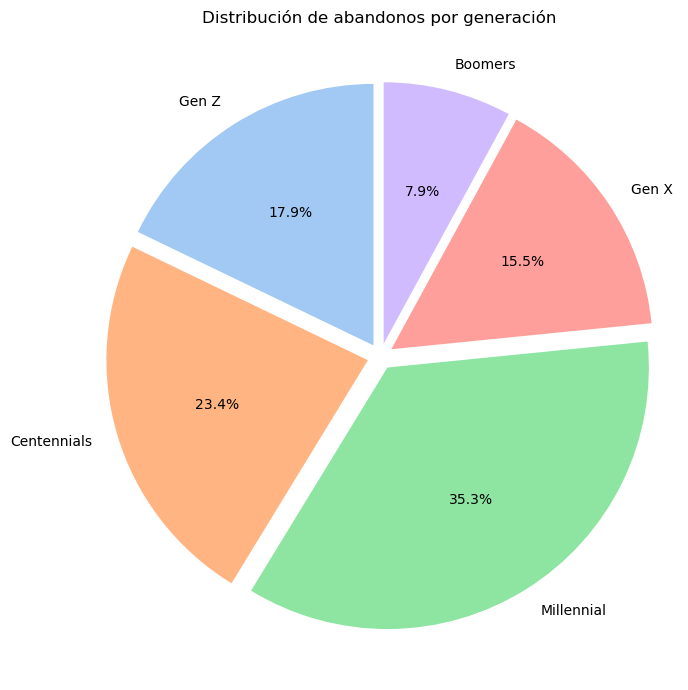

In [12]:
# Orden deseado
orden_gen = ['Gen Z', 'Centennials', 'Millennial', 'Gen X', 'Boomers']
abandono_por_edad = abandono_por_edad.reindex(orden_gen).dropna()

# Gr√°fico de tarta
plt.figure(figsize=(7, 7))
plt.pie(abandono_por_edad, 
        labels=abandono_por_edad.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel', len(abandono_por_edad)),
        explode=[0.05]*len(abandono_por_edad))

plt.title('Distribuci√≥n de abandonos por generaci√≥n')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotaci√≥n por Edad

    Conclusi√≥n: La tasa de rotaci√≥n es considerablemente m√°s alta entre los empleados m√°s j√≥venes. A medida que aumenta la edad, la tasa de abandono disminuye. Esto puede estar relacionado con la b√∫squeda de estabilidad laboral en etapas m√°s avanzadas de la vida o con mayores responsabilidades familiares o econ√≥micas.

Rotaci√≥n por Generaci√≥n

    Conclusi√≥n: Las generaciones m√°s j√≥venes (Gen Z y Centennials) presentan las tasas de abandono m√°s elevadas. En contraste, los empleados pertenecientes a generaciones mayores como Gen X y Boomers muestran menor rotaci√≥n. Esto sugiere una posible diferencia en las expectativas laborales o en el compromiso con la organizaci√≥n entre generaciones


`G√©nero`

In [13]:
# Filtrar solo las personas que abandonaron por g√©nero:
abandono_por_genero = df.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)['Yes']
abandono_por_genero

Gender
Female     93
Male      159
Name: Yes, dtype: int64

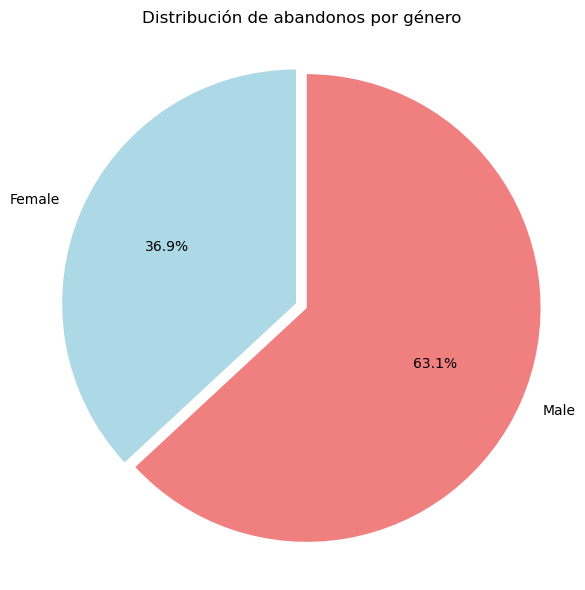

In [14]:
# Crear el gr√°fico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_genero, 
        labels=abandono_por_genero.index, 
        autopct='%.1f%%', 
        startangle=90, 
        colors=['lightblue', 'lightcoral'], 
        explode=(0.05, 0))  # resalta la primera categor√≠a

plt.title('Distribuci√≥n de abandonos por g√©nero')
plt.axis('equal')  # Asegura que el c√≠rculo sea circular
plt.tight_layout()
plt.show()

Rotaci√≥n por G√©nero

    Conclusi√≥n: La distribuci√≥n de la rotaci√≥n por g√©nero puede revelar diferencias sutiles, pero si un g√©nero muestra m√°s abandono (por ejemplo, mujeres), podr√≠a indicar desigualdades en el entorno laboral, conciliaci√≥n vida-trabajo o desarrollo profesional. Si la diferencia no es significativa, se puede concluir que la rotaci√≥n es relativamente equitativa por g√©nero.

`Estado Civil`

In [15]:
# Por estado:
abandono_por_estado = df[df['Attrition'] == 'Yes']['Marital_Status'].value_counts()

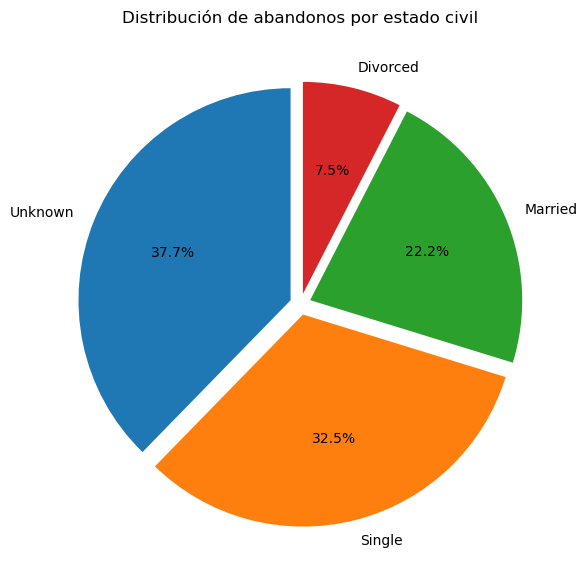

In [16]:
# Crear el gr√°fico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_estado, 
        labels=abandono_por_estado.index, 
        autopct='%.1f%%', 
        startangle=90, 
        explode=[0.05]*len(abandono_por_estado)) 

plt.title('Distribuci√≥n de abandonos por estado civil')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotaci√≥n por Estado Civil

    Conclusi√≥n: Las personas solteras suelen presentar una mayor tasa de abandono en comparaci√≥n con personas casadas o divorciadas. Esto puede deberse a una mayor movilidad, menos responsabilidades familiares o mayor disposici√≥n al cambio por parte de los empleados solteros.

`Nivel de estudios`

In [17]:
# Nivel de estudios:
abandono_por_estudios = df[df['Attrition'] == 'Yes']['Education'].value_counts()

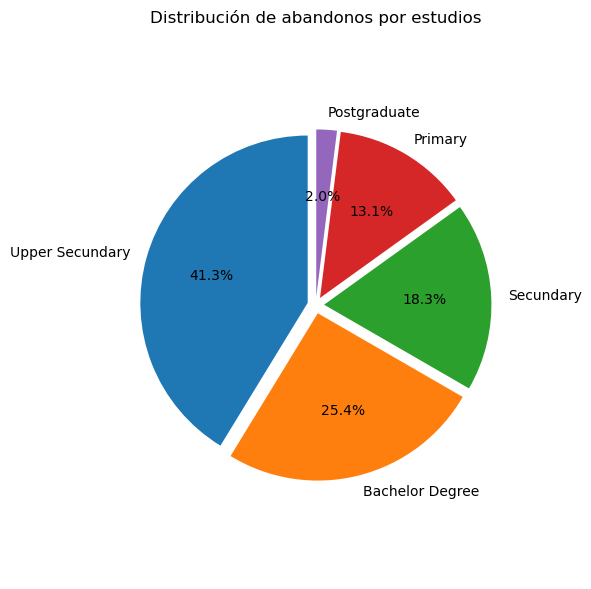

In [18]:
# Crear el gr√°fico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_estudios, 
        labels=abandono_por_estudios.index, 
        autopct='%.1f%%', 
        startangle=90, 
        explode=[0.05]*len(abandono_por_estudios)) 

plt.title('Distribuci√≥n de abandonos por estudios')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotaci√≥n por Nivel Educativo

    Conclusi√≥n: La rotaci√≥n tiende a variar con el nivel educativo. En algunos casos, los empleados con niveles educativos m√°s bajos abandonan m√°s, quiz√°s por acceder a empleos menos estables o peor remunerados. Sin embargo, tambi√©n puede ocurrir que quienes tienen niveles altos (como posgrados) busquen mejores oportunidades y rotan m√°s si no est√°n satisfechos.

`Experiencia` (CAMBIAR A GRAFICO QUESITO!!!)

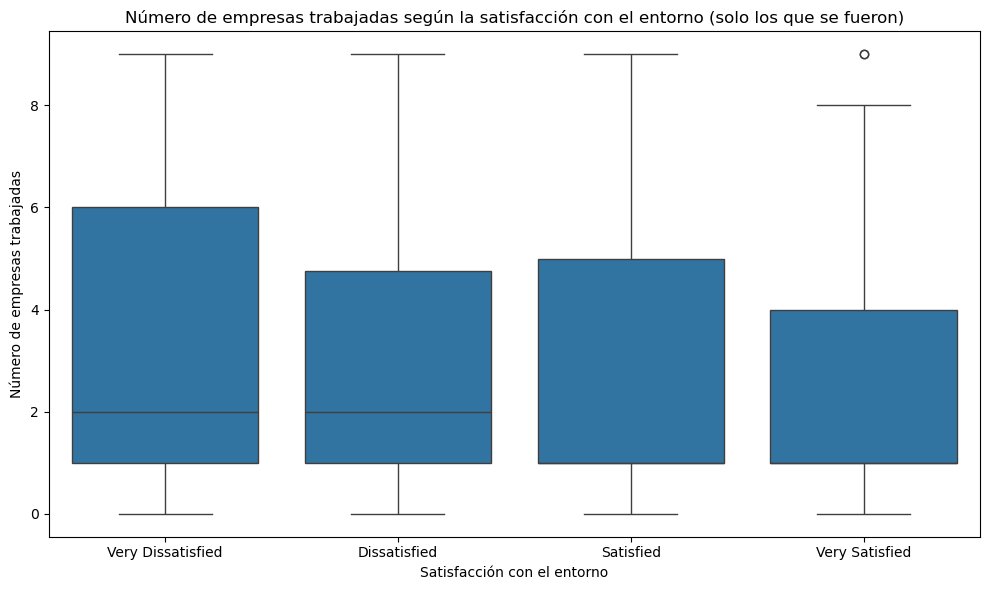

In [19]:
# Filtrar solo empleados que dejaron la empresa
df_plot = df[df['Attrition'] == 'Yes'].copy()

# Graficar
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Environment_Sat_Cat',
    y='Num_Companies_Worked',
    data=df_plot,
    order=['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Very Satisfied']
)

plt.title('N√∫mero de empresas trabajadas seg√∫n la satisfacci√≥n con el entorno (solo los que se fueron)')
plt.xlabel('Satisfacci√≥n con el entorno')
plt.ylabel('N√∫mero de empresas trabajadas')
plt.tight_layout()
plt.show()


 N√∫mero de Empresas Trabajadas y Satisfacci√≥n con el Entorno Laboral
Este conjunto de diagramas de caja examina si el n√∫mero de empresas previas en las que ha trabajado un empleado est√° relacionado con su satisfacci√≥n actual con el entorno laboral.

La mediana es constante en torno a 2 empresas trabajadas para todos los niveles de satisfacci√≥n.

El rango intercuart√≠lico es similar entre grupos (entre 1 y 4 empresas), y todos presentan valores at√≠picos con m√°s de 8 empleos anteriores.

Conclusi√≥n: No se observa una relaci√≥n clara entre el n√∫mero de empresas en las que ha trabajado un empleado y su nivel de satisfacci√≥n con el entorno laboral actual.

`JOB SATISFACTION` (CAMBIAR A GRAFICO QUESITO!!!)

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\4037127790.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='Job_Sat_Cat', palette='pastel')


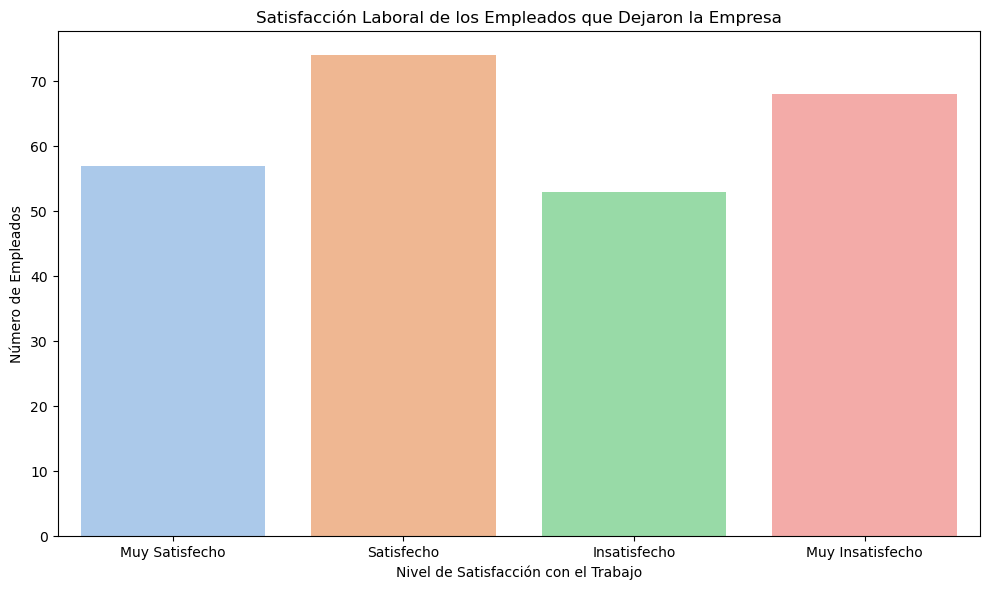

In [20]:

df_plot = df[df['Attrition'] == 'Yes'].copy()

# Traducir las categor√≠as de satisfacci√≥n laboral
traduccion = {
    'Very Dissatisfied': 'Muy Insatisfecho',
    'Dissatisfied': 'Insatisfecho',
    'Satisfied': 'Satisfecho',
    'Very Satisfied': 'Muy Satisfecho'
}
df_plot['Job_Sat_Cat'] = df_plot['Job_Sat_Cat'].replace(traduccion)

# Definir el orden deseado de las categor√≠as
orden_satisfaccion = ['Muy Satisfecho', 'Satisfecho', 'Insatisfecho', 'Muy Insatisfecho']
df_plot['Job_Sat_Cat'] = pd.Categorical(df_plot['Job_Sat_Cat'], categories=orden_satisfaccion, ordered=True)

# Graficar solo los empleados que dejaron la empresa
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot, x='Job_Sat_Cat', palette='pastel')

plt.title('Satisfacci√≥n Laboral de los Empleados que Dejaron la Empresa')
plt.xlabel('Nivel de Satisfacci√≥n con el Trabajo')
plt.ylabel('N√∫mero de Empleados')
plt.tight_layout()
plt.show()


#### Porcentaje de rotaci√≥n por `Job_Role` (Puesto de Trabajo)

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3884936515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


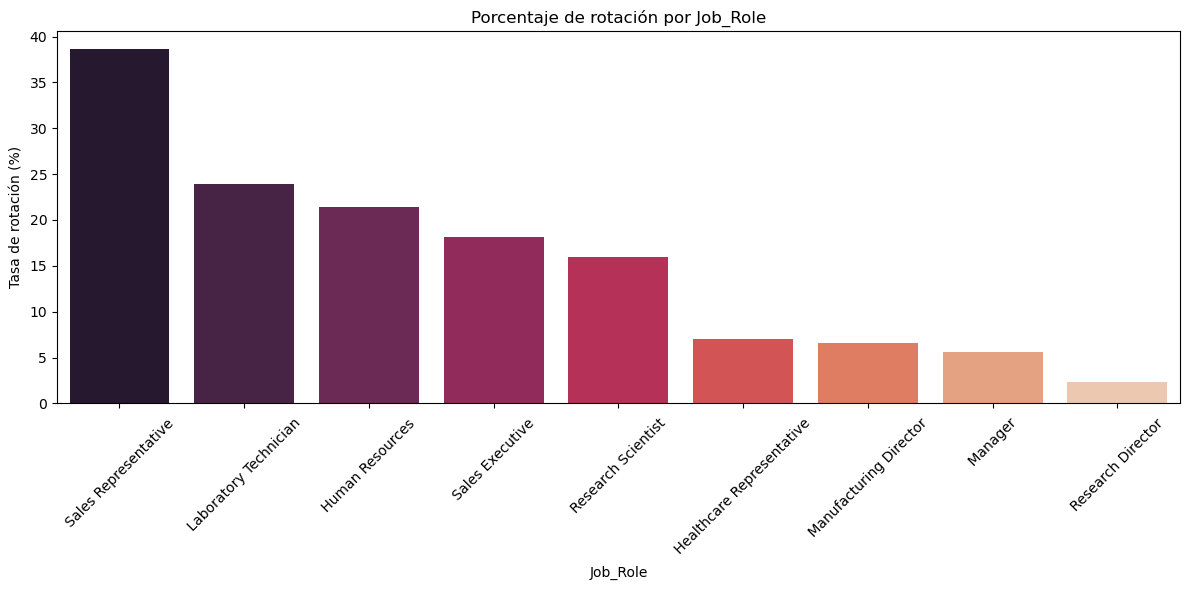

In [21]:
# Calcular la tasa de rotaci√≥n seg√∫n Job_Role
df_percent = df.groupby("Job_Role")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotaci√≥n por Job_Role")
plt.ylabel("Tasa de rotaci√≥n (%)")
plt.xlabel("Job_Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que los empleados con roles de Sales Representative y Laboratory Technician presentan mayor n√∫mero absoluto de abandonos.

Los roles como Manager y Research Director tienen bajas tasas de abandono.

‚úÖ Conclusi√≥n: Ciertos puestos operativos o menos especializados tienden a tener m√°s rotaci√≥n. Esto sugiere que los cargos con menor estabilidad o menores oportunidades de crecimiento presentan mayor attrition.

 #### Jerarqu√≠a de Puesto

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3507546478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


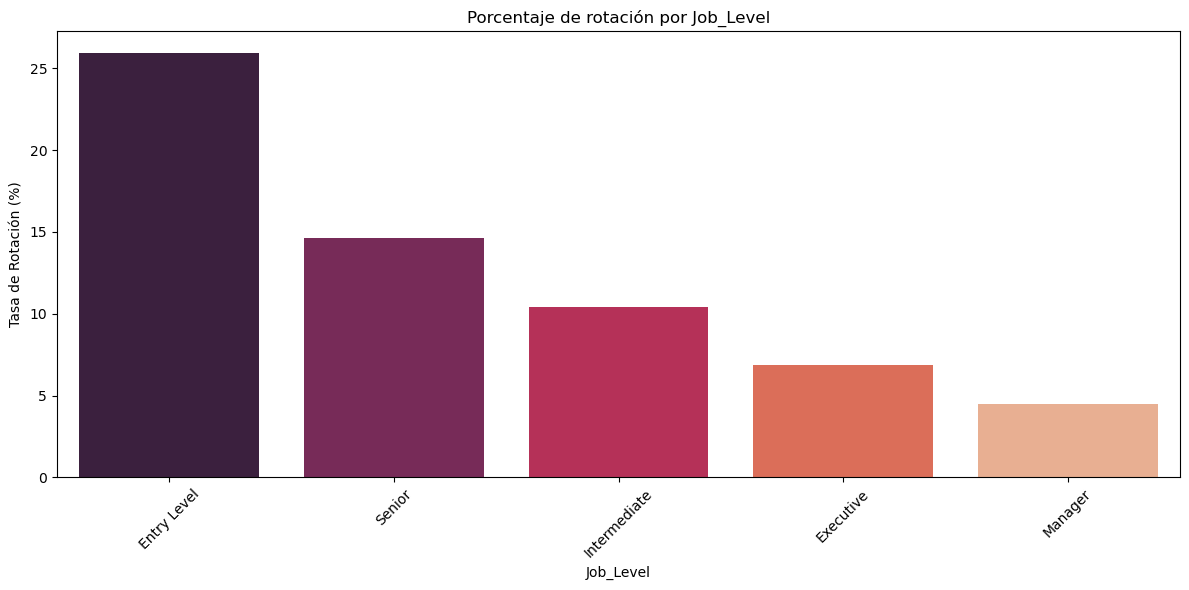

In [22]:
# Calcular la tasa de rotaci√≥n seg√∫n Job_Level
df_percent = df.groupby("Job_Level")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotaci√≥n por Job_Level")
plt.ylabel("Tasa de Rotaci√≥n (%)")
plt.xlabel("Job_Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los niveles de entrada (Entry Level) e intermedios tienen mayor cantidad de abandonos.

En niveles altos (Manager, Executive) casi no hay rotaci√≥n.

‚úÖ Conclusi√≥n: Los empleados de nivel m√°s bajo est√°n m√°s propensos a abandonar la empresa, posiblemente por razones salariales, de insatisfacci√≥n o b√∫squeda de crecimiento.

#### Frecuencia de viajes de trabajo

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\368651325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


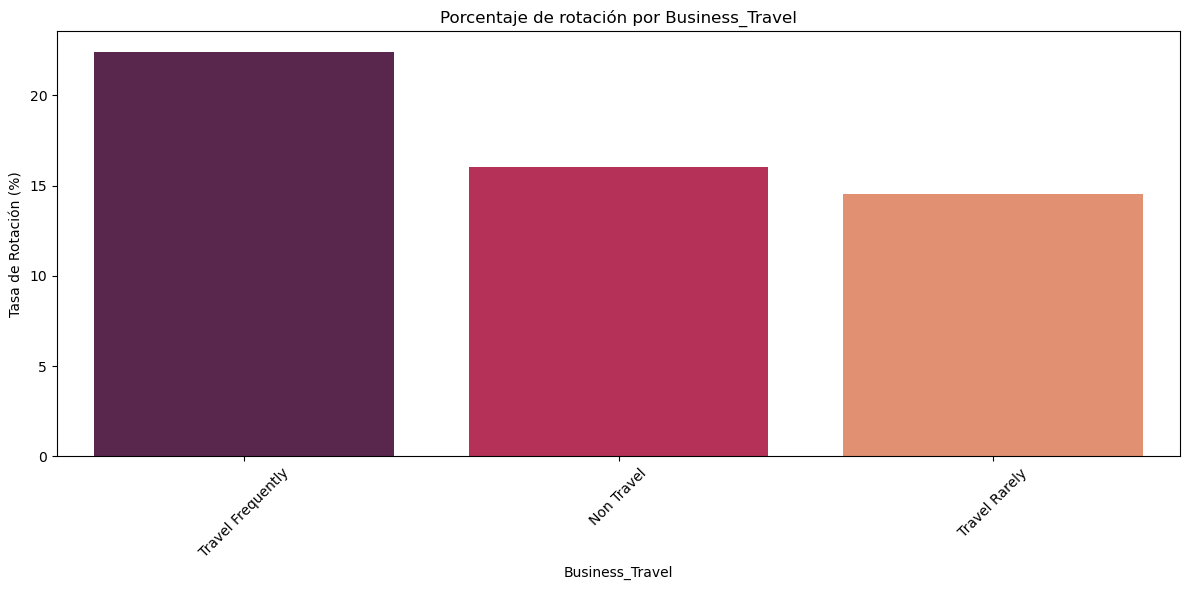

In [23]:
# Calcular porcentaje de empleados que se fueron por grupo para Business_Travel
df_percent = df.groupby("Business_Travel")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotaci√≥n por Business_Travel")
plt.ylabel("Tasa de Rotaci√≥n (%)")
plt.xlabel("Business_Travel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aquellos que viajan frecuentemente tienen m√°s rotaci√≥n proporcionalmente.

Los que no viajan o viajan rara vez tienen menos tasa de abandono.

‚úÖ Conclusi√≥n: La frecuencia alta de viajes puede generar desgaste, afectar el equilibrio vida-trabajo y fomentar la rotaci√≥n.

#### Horas est√°ndar

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1269139827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


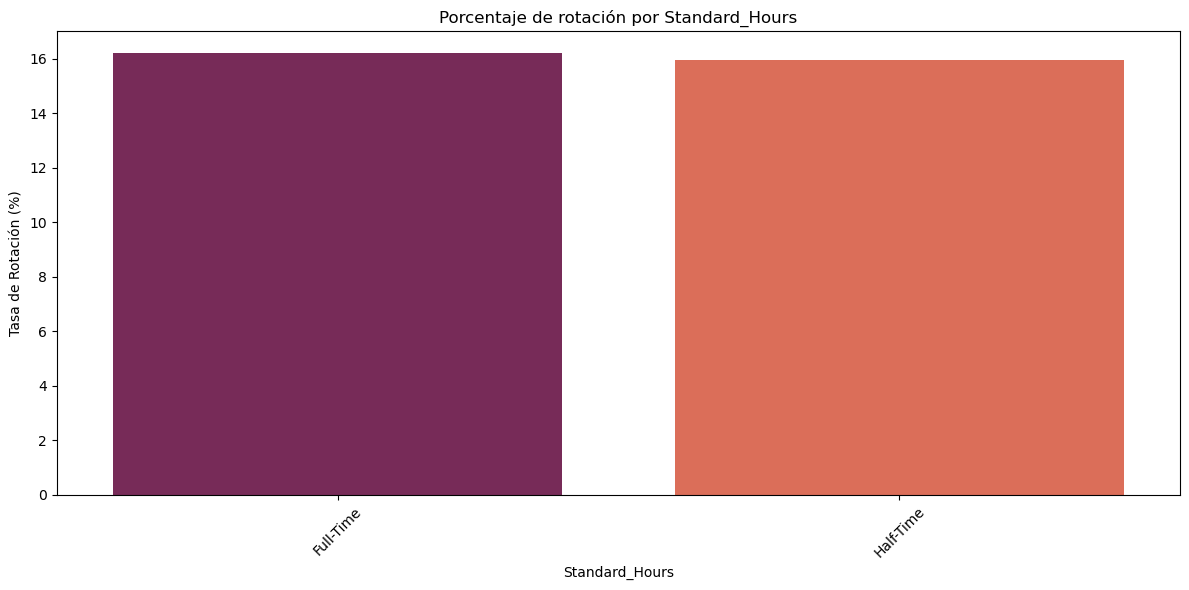

In [24]:
# Calcular porcentaje de empleados que se fueron por grupo para Standard_Hours
df_percent = df.groupby("Standard_Hours")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotaci√≥n por Standard_Hours")
plt.ylabel("Tasa de Rotaci√≥n (%)")
plt.xlabel("Standard_Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tanto a tiempo completo como parcial hay rotaci√≥n, pero proporcionalmente parece m√°s com√∫n en Half-Time.

‚úÖ Conclusi√≥n: Aunque la mayor√≠a de la empresa es full-time, los empleados part-time muestran una tasa de abandono relativamente elevada, lo que podr√≠a deberse a precariedad laboral o falta de integraci√≥n.

## 4. MOTIVOS DE ABANDONO

### üß† Satisfacci√≥n y Bienestar

#### Factores Clave de la Rotaci√≥n: Satisfacci√≥n, Ambiente y Relaciones Laborales:

1. ¬øExiste menor satisfacci√≥n laboral entre los que se marchan? 
2. ¬øC√≥mo afecta la satisfacci√≥n con el ambiente laboral a la rotaci√≥n? 
3. ¬øQu√© nivel de relaci√≥n interpersonal tienen quienes se van?

In [25]:
# CONFIGURACION DE LOS DATOS
# -----------------------------------------------------------------------

satisf_vars = ['Job_Satisfaction', 'Environment_Satisfaction', 'Relationship_Satisfaction']
nivel_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Satisfied',
    4: 'Very Satisfied'
}

orden_niveles = ['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Very Satisfied']
nivel_labels_cat = pd.CategoricalDtype(categories=orden_niveles, ordered=True)

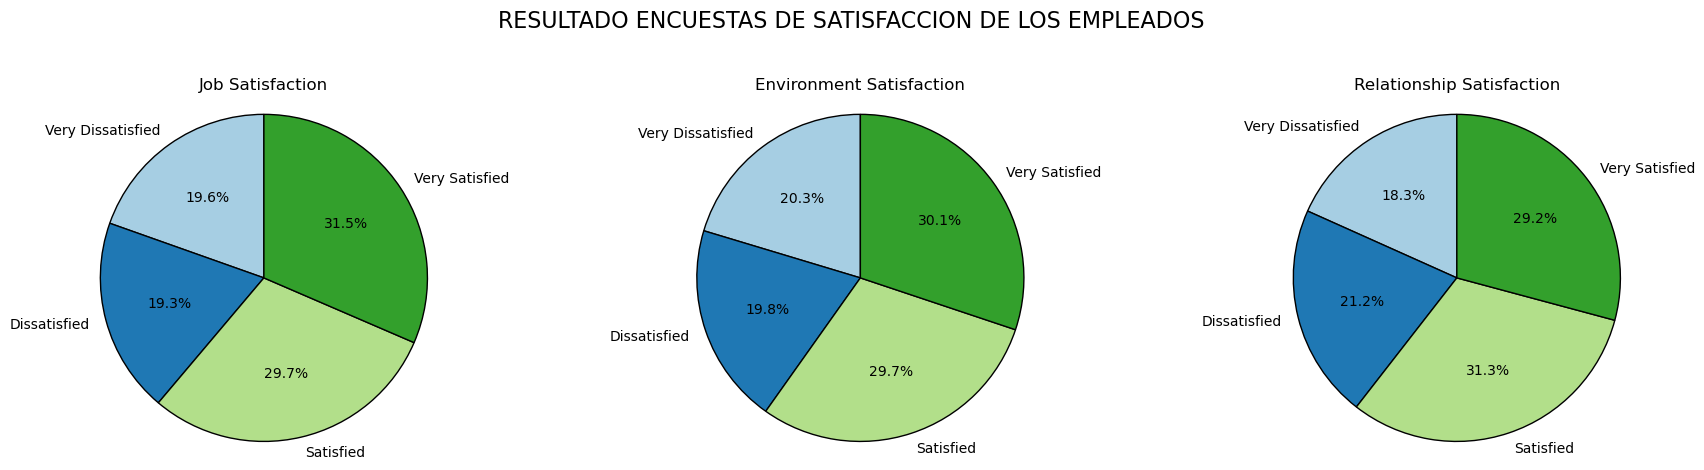

In [26]:
# GRAFICO 1: RESPUESTAS DE LAS ENCUESTAS DE SATISFACCI√ìN
# -----------------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(satisf_vars):
    # Conteo por nivel
    counts = df[var].map(nivel_labels).value_counts().reindex(orden_niveles)
    
    # Pie chart
    axes[i].pie(
        counts,
        labels=orden_niveles,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    
    axes[i].axis('equal')  # Hacerlo circular
    axes[i].set_title(var.replace("_", " ").title())

plt.suptitle('RESULTADO ENCUESTAS DE SATISFACCION DE LOS EMPLEADOS', fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [27]:
# TASA DE ABANDOMENTO POR NIVEL DE SATISFACCI√ìN
# -----------------------------------------------------------------------

# Diccionario para guardar las tablas
tablas = {}

for var in satisf_vars:
    # Agrupar y calcular proporciones por nivel y attrition
    tabla = df.groupby([df[var].map(nivel_labels), 'Attrition']).size().unstack().fillna(0)
    
    # Convertir a porcentaje por fila
    tabla_percent = tabla.div(tabla.sum(axis=1), axis=0) * 100
    
    # Renombrar columnas
    tabla_percent.rename(columns={'Yes': 'S√≠', 'No': 'No'}, inplace=True)

    # Guardar
    tablas[var] = tabla_percent.round(2)




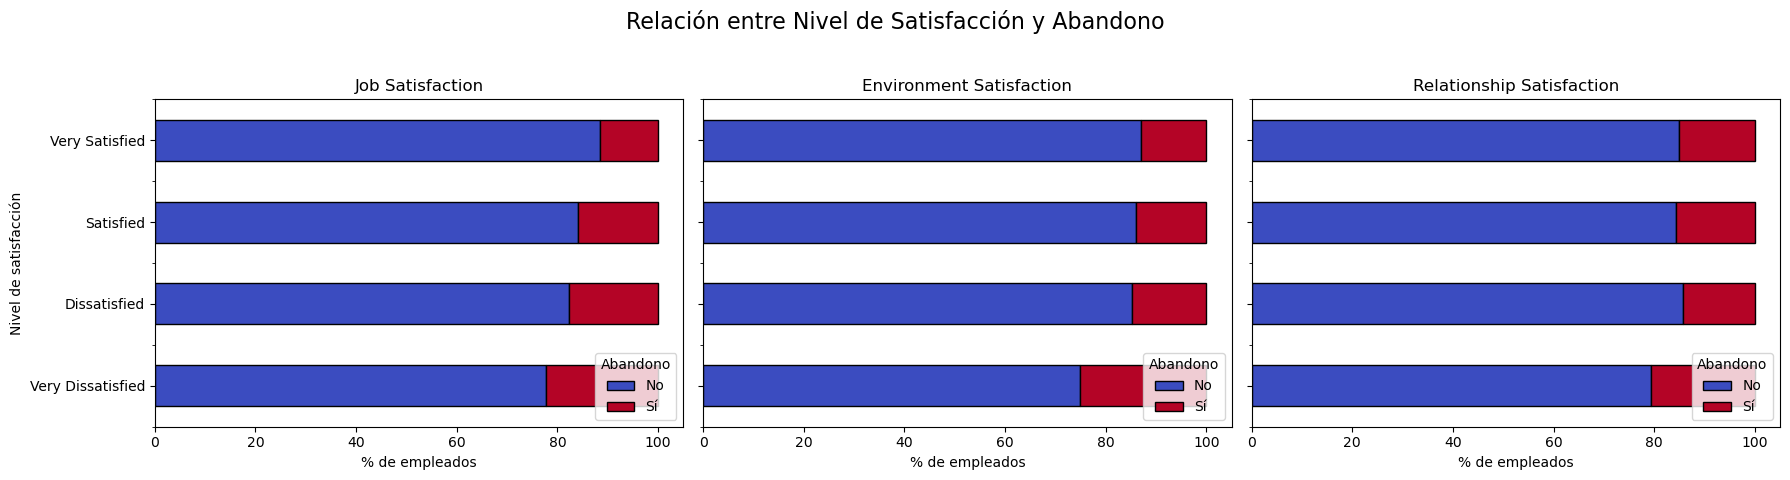

In [28]:
# GRAFICO 2: RELACION ENTRE NIVEL DE SATISFACCI√ìN Y ABANDONO

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for i, var in enumerate(satisf_vars):
    tablas[var].loc[orden_niveles].plot(
        kind='barh',
        stacked=True,
        ax=axes[i],
        colormap='coolwarm',
        edgecolor='black'
    )
    
    axes[i].set_title(var.replace("_", " ").title())
    axes[i].set_xlabel('% de empleados')
    axes[i].set_ylabel('Nivel de satisfacci√≥n' if i == 0 else '')
    axes[i].legend(title='Abandono', loc='lower right')

plt.suptitle('Relaci√≥n entre Nivel de Satisfacci√≥n y Abandono', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


üìä Conclusiones: Relaci√≥n entre Satisfacci√≥n y Abandono

1. Satisfacci√≥n en el Puesto de Trabajo
Existe una clara correlaci√≥n negativa entre la satisfacci√≥n en el puesto y la tasa de abandono.  
Los empleados que se sienten **"Muy insatisfechos"** son significativamente m√°s propensos a abandonar la empresa, mientras que aquellos **"Muy satisfechos"** tienden a quedarse.  
üëâ *Mejorar la satisfacci√≥n en el trabajo puede ser una palanca clave para reducir la rotaci√≥n.*

2. Satisfacci√≥n con el Ambiente Laboral
La percepci√≥n del entorno laboral tambi√©n influye directamente en la retenci√≥n.  
Los trabajadores **insatisfechos con el ambiente** muestran tasas de abandono mucho m√°s elevadas.  
üëâ *Crear un entorno positivo, seguro y colaborativo puede contribuir significativamente a la fidelizaci√≥n del talento.*

 3. Satisfacci√≥n con las Relaciones Interpersonales
Aunque la influencia es algo m√°s moderada, tambi√©n se observa que quienes tienen **baja satisfacci√≥n con sus relaciones laborales** abandonan con mayor frecuencia.  
üëâ *Fomentar la cohesi√≥n del equipo y la comunicaci√≥n puede ayudar a reducir el desgaste emocional y el abandono.*

 üìå Conclusi√≥n General
> Los datos confirman que **los niveles de satisfacci√≥n tienen un impacto directo en la decisi√≥n de permanecer o abandonar la empresa**.  
> Mejorar el clima laboral, el entorno de trabajo y las relaciones personales es esencial para **reducir la rotaci√≥n y aumentar la retenci√≥n de talento** en la organizaci√≥n.


#### Impacto del Balance Vida-Trabajo y Horas Extra en la Retenci√≥n del Personal

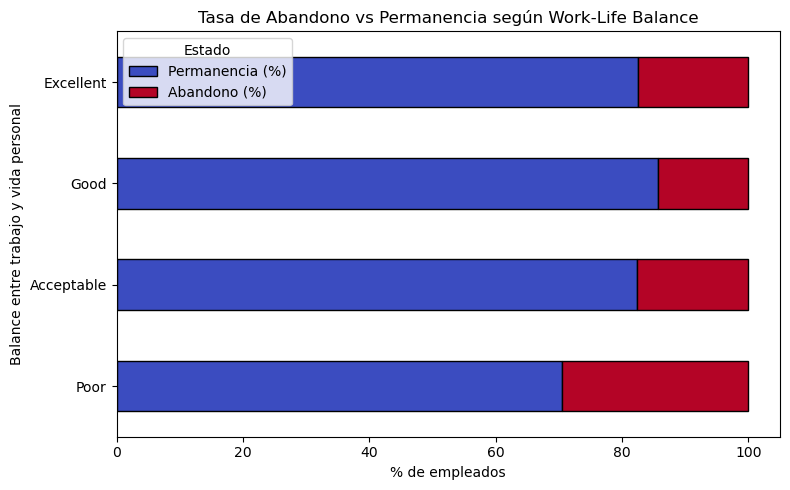

In [29]:
# GRAFICO 3: RELACION ENTRE BALANCE ENTRE TRABAJO Y VIDA PERSONAL Y ABANDONO

# Diccionario de etiquetas para Work-Life Balance
labels_wlb = {
    1: 'Poor',
    2: 'Acceptable',
    3: 'Good',
    4: 'Excellent'
}

# Crear una nueva columna con etiquetas legibles
df['WLB_Label'] = df['Work_Life_Balance'].map(labels_wlb)

# Calcular la tasa de abandono por nivel de balance
tasa_abandono_wlb = df.groupby('WLB_Label')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tasa_abandono_wlb = tasa_abandono_wlb.rename(columns={'Yes': 'Abandono (%)', 'No': 'Permanencia (%)'})
tasa_abandono_wlb = tasa_abandono_wlb.loc[['Poor', 'Acceptable', 'Good', 'Excellent']]  # asegurar el orden

# Crear gr√°fico apilado
tasa_abandono_wlb.plot(kind='barh', stacked=True, figsize=(8, 5), colormap='coolwarm', edgecolor='black')

plt.xlabel('% de empleados')
plt.ylabel('Balance entre trabajo y vida personal')
plt.title('Tasa de Abandono vs Permanencia seg√∫n Work-Life Balance')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()


In [30]:
# TASA DE ABANDONO POR BALANCE ENTRE TRABAJO Y VIDA PERSONAL
# -----------------------------------------------------------------------

tasa_abandono_wlb = df.groupby('WLB_Label')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tasa_abandono_wlb.rename(columns={"Yes": "Tasa Abandono (%)", "No": "Tasa Permanencia (%)"}, inplace=True)
# Definir el orden deseado
orden_personalizado = ['Poor', 'Acceptable', 'Good', 'Excellent']

# Reordenar la tabla
tasa_abandono_wlb = tasa_abandono_wlb.loc[orden_personalizado]

# Mostrar la tabla ordenada

display(tasa_abandono_wlb.round(2))


Attrition   Tasa Permanencia (%)  Tasa Abandono (%)
WLB_Label                                          
Poor                       70.51              29.49
Acceptable                 82.37              17.63
Good                       85.69              14.31
Excellent                  82.47              17.53

‚úÖ Conclusiones principales:
Mayor abandono se observa en el grupo con "Poor" (pobre) balance, con m√°s del 25% de empleados abandonando la empresa.

Aunque la mayor√≠a de empleados se encuentran en la categor√≠a "Good", su tasa de abandono es moderada, no la m√°s alta.

Los niveles "Excellent" y "Acceptable" tienen tasas de abandono m√°s bajas, especialmente el nivel m√°s alto, que es donde m√°s se retiene talento.

In [31]:
# TASA DE ABANDONO POR OVERTIME
tabla_ot = df.groupby('Over_Time')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_ot = tabla_ot.rename(columns={'Yes': 'Abandono (%)', 'No': 'Permanencia (%)'}).round(2)
display(tabla_ot)

Attrition  Permanencia (%)  Abandono (%)
Over_Time                               
No                   89.07         10.93
Unknown              84.10         15.90
Yes                  69.60         30.40

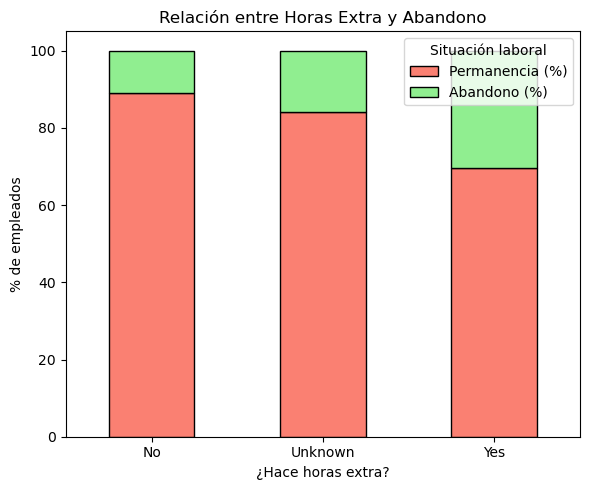

In [32]:
# GRAFICO 4: RELACION ENTRE BALANCE ENTRE HORAS EXTRA DE TRABAJO Y ABANDONO
tabla_ot.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], figsize=(6, 5), edgecolor='black')
plt.title("Relaci√≥n entre Horas Extra y Abandono")
plt.xlabel("¬øHace horas extra?")
plt.ylabel("% de empleados")
plt.legend(title="Situaci√≥n laboral")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Conclusiones:
Los empleados que hacen horas extra tienen una tasa de abandono aproximadamente 3 veces mayor que los que no hacen.

Este patr√≥n puede indicar sobrecarga, desmotivaci√≥n o falta de conciliaci√≥n.

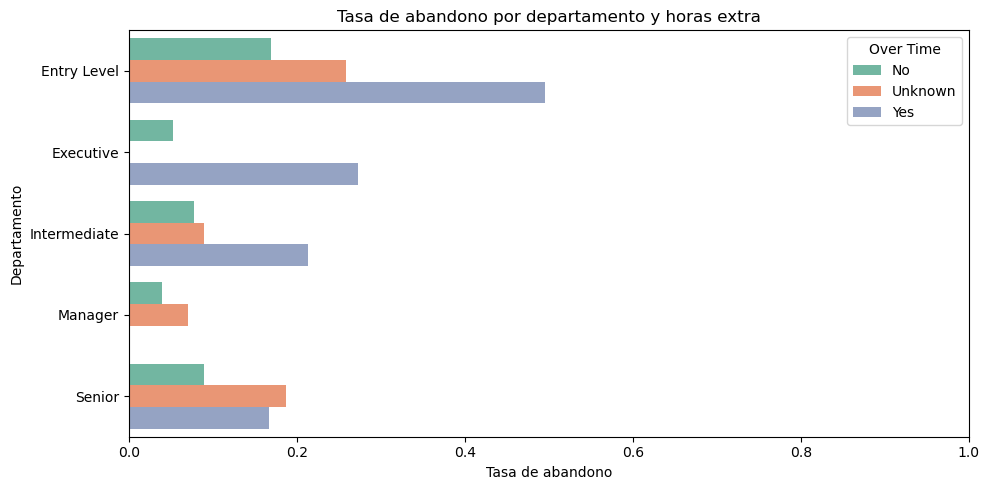

In [33]:
# GRAFICO 5: RELACION ENTRE NIVELES, HORAS EXTRA y ABANDONO

# 1. Convertimos Attrition a 0/1 para poder calcular tasa
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(data=df_ot, x='Attrition_Flag', y='Job_Level', hue='Over_Time', palette='Set2')
plt.title("Tasa de abandono por departamento y horas extra")
plt.xlabel("Tasa de abandono")
plt.ylabel("Departamento")
plt.xlim(0, 1)
plt.legend(title='Over Time')
plt.tight_layout()
plt.show()

df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()


### Conclusiones del gr√°fico: Tasa de abandono por departamento y horas extra

- Los empleados que hacen horas extra presentan una mayor tasa de abandono en todos los niveles.
- El abandono es especialmente alto en el nivel Entry Level cuando se realizan horas extra (m√°s del 40%).
- Intermediate y Executive tambi√©n muestran tasas elevadas con horas extra.
- Los niveles Manager y Executive tienen tasas de abandono bajas, pero no nulas.
- La categor√≠a "Unknown" en OverTime muestra abandono significativo, lo que sugiere posible falta de control en el registro de jornada.


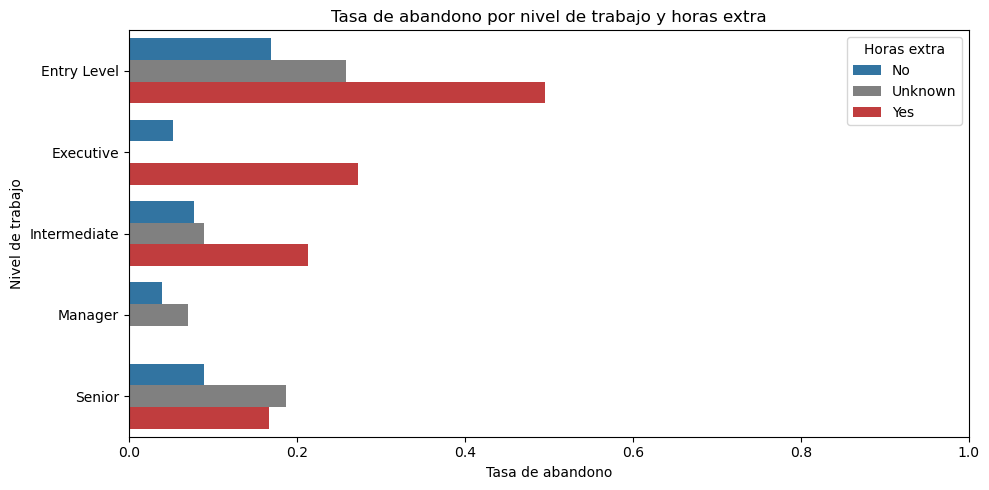

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear abandono a num√©rico
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Agrupar
df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()

# Diccionario de colores personalizado
palette = {
    'Yes': '#d62728',   # rojo
    'No': '#1f77b4',    # azul
    'Unknown': 'gray'   # opcional, por si aparece
}

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_ot,
    x='Attrition_Flag',
    y='Job_Level',
    hue='Over_Time',
    palette=palette
)

plt.title("Tasa de abandono por nivel de trabajo y horas extra")
plt.xlabel("Tasa de abandono")
plt.ylabel("Nivel de trabajo")
plt.xlim(0, 1)
plt.legend(title='Horas extra')
plt.tight_layout()
plt.show()


#### Entorno Laboral

1. ¬øEl teletrabajo ayuda a retener empleados? REVISAR GRAFICO

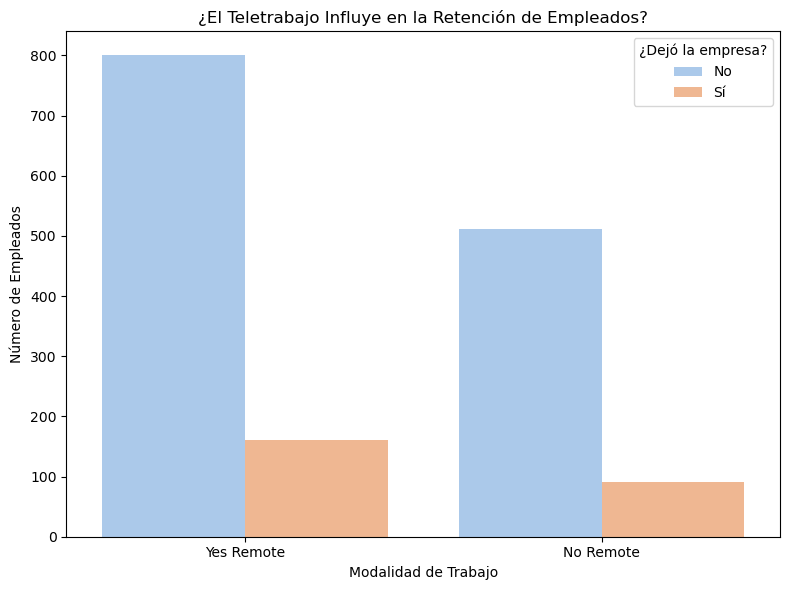

In [35]:

traduccion_remoto = {'Yes': 'Teletrabajo', 'No': 'Presencial'}
traduccion_attrition = {'Yes': 'S√≠', 'No': 'No'}
# Copiar el DataFrame original
df_plot = df.copy()
# Aplicar las traducciones
df_plot['Remote_Work'] = df_plot['Remote_Work'].replace(traduccion_remoto)
df_plot['Attrition'] = df_plot['Attrition'].replace(traduccion_attrition)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot, x='Remote_Work', hue='Attrition', palette='pastel')
plt.title('¬øEl Teletrabajo Influye en la Retenci√≥n de Empleados?')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('N√∫mero de Empleados')
plt.legend(title='¬øDej√≥ la empresa?')
plt.tight_layout()
plt.show()

¬øInfluye el Teletrabajo en la Satisfacci√≥n y Retenci√≥n?
Este gr√°fico compara el nivel de satisfacci√≥n laboral entre quienes se quedaron y quienes se fueron. Aunque el t√≠tulo sugiere una conexi√≥n con el teletrabajo, esta variable no se desglosa directamente en el gr√°fico.

Empleados que se quedaron:
Predominan los niveles altos de satisfacci√≥n ("Muy Satisfecho" y "Satisfecho"), con m√°s de 400 empleados en estas categor√≠as.

Empleados que se fueron:
La distribuci√≥n es m√°s uniforme: todos los niveles de satisfacci√≥n tienen entre 50 y 70 empleados que renunciaron, incluyendo "Muy Satisfechos".

Conclusi√≥n: La satisfacci√≥n laboral sigue estando correlacionada con la retenci√≥n. Sin embargo, el hecho de que empleados satisfechos tambi√©n se vayan sugiere que la satisfacci√≥n no es suficiente por s√≠ sola. Aunque el t√≠tulo menciona el teletrabajo, ser√≠a necesario incluir esa variable expl√≠citamente para extraer conclusiones al respecto.

`Implicaci√≥n en el trabajo`

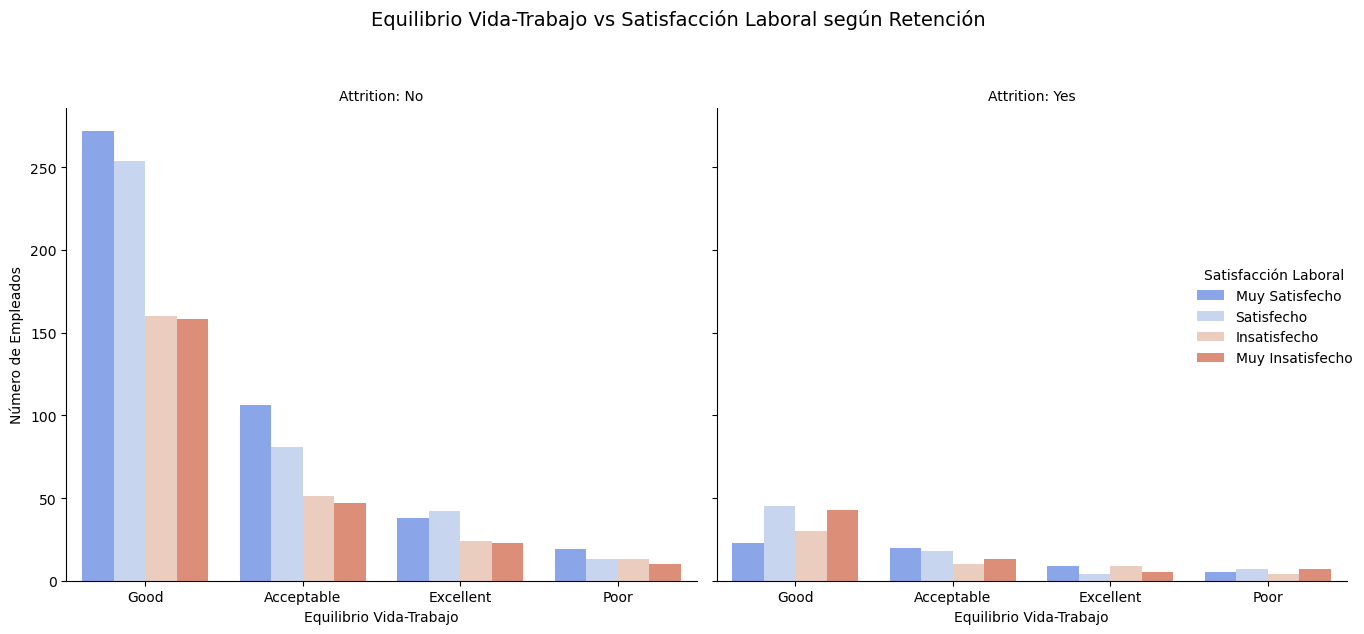

In [36]:
# 2. ¬øLa implicaci√≥n laboral (Job_Involvement) est√° relacionada con la retenci√≥n?
# Traducir y ordenar Job_Sat_Cat si no est√° ya hecho
traduccion = {
    'Very Dissatisfied': 'Muy Insatisfecho',
    'Dissatisfied': 'Insatisfecho',
    'Satisfied': 'Satisfecho',
    'Very Satisfied': 'Muy Satisfecho'
}

df_plot = df.copy()
df_plot['Job_Sat_Cat'] = df_plot['Job_Sat_Cat'].replace(traduccion)

orden_satisfaccion = ['Muy Satisfecho', 'Satisfecho', 'Insatisfecho', 'Muy Insatisfecho']
df_plot['Job_Sat_Cat'] = pd.Categorical(df_plot['Job_Sat_Cat'], categories=orden_satisfaccion, ordered=True)

# Crear gr√°fico con FacetGrid para cruzar tambi√©n con Attrition
g = sns.catplot(
    data=df_plot,
    kind='count',
    x='Work_Balance_Cat',
    hue='Job_Sat_Cat',
    col='Attrition',
    palette='coolwarm',
    height=6,
    aspect=1
)

g.set_titles('Attrition: {col_name}')
g.set_axis_labels('Equilibrio Vida-Trabajo', 'N√∫mero de Empleados')
g._legend.set_title('Satisfacci√≥n Laboral')
g.fig.suptitle('Equilibrio Vida-Trabajo vs Satisfacci√≥n Laboral seg√∫n Retenci√≥n', fontsize=14, y=1.05)

plt.tight_layout()
plt.show()


 Equilibrio Vida-Trabajo y Satisfacci√≥n Laboral seg√∫n Retenci√≥n
Este gr√°fico muestra la relaci√≥n entre el equilibrio vida-trabajo, la satisfacci√≥n laboral y la retenci√≥n de empleados, separando los datos entre quienes se fueron y quienes se quedaron.

Empleados que se quedaron:
Predominan percepciones de equilibrio "Good" o "Acceptable", con altos niveles de satisfacci√≥n laboral ("Muy Satisfecho" y "Satisfecho"). Incluso en extremos como "Excellent" o "Poor", la mayor√≠a se mantiene satisfecha.

Empleados que se fueron:
Aunque hay empleados "Muy Satisfechos" que se fueron, el grupo muestra una mayor proporci√≥n de personas "Insatisfechas" o "Muy Insatisfechas", incluso entre aquellos con equilibrio vida-trabajo "Excellent".

Conclusi√≥n: Un buen equilibrio entre vida personal y trabajo, junto con una alta satisfacci√≥n laboral, est√° fuertemente asociado con la retenci√≥n. Por el contrario, la insatisfacci√≥n, aunque se d√© en contextos de equilibrio aceptable, parece ser un factor clave en la salida de empleados.

`Evaluaci√≥n del desempe√±o`

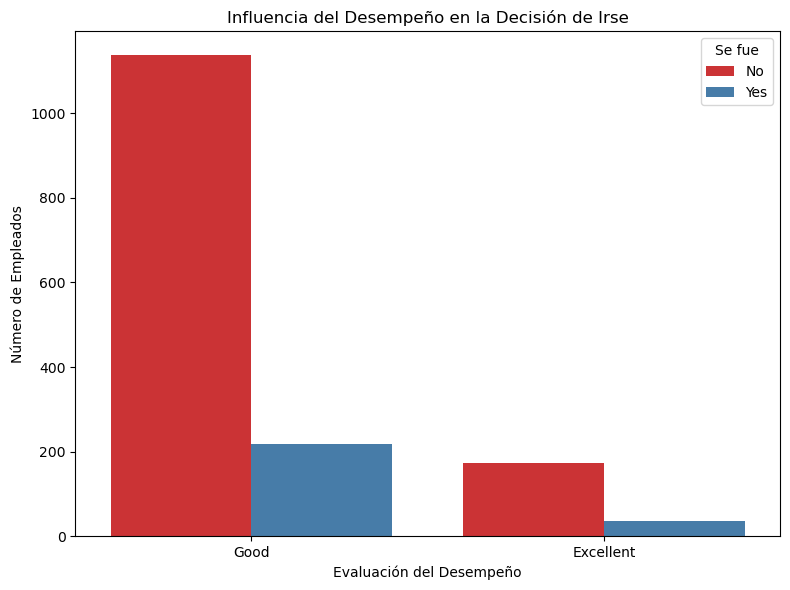

In [37]:
# 3. ¬øInfluye la evaluaci√≥n del desempe√±o en la decisi√≥n de irse? 

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Performance_Rat_Cat', hue='Attrition', palette='Set1')

plt.title('Influencia del Desempe√±o en la Decisi√≥n de Irse')
plt.xlabel('Evaluaci√≥n del Desempe√±o')
plt.ylabel('N√∫mero de Empleados')
plt.legend(title='Se fue')
plt.tight_layout()
plt.show()


Desempe√±o y Decisi√≥n de Irse
Esta gr√°fica analiza si la evaluaci√≥n de desempe√±o influye en la decisi√≥n de permanencia, comparando empleados con desempe√±o "Good" y "Excellent".

Desempe√±o "Good":
La gran mayor√≠a permanece en la empresa, con una proporci√≥n relativamente peque√±a de salidas.

Desempe√±o "Excellent":
Aunque hay menos empleados en esta categor√≠a, la mayor√≠a tambi√©n se queda. Solo un n√∫mero reducido de empleados con desempe√±o excelente se va.

Conclusi√≥n: Los empleados de alto rendimiento tienden a permanecer en la organizaci√≥n, lo que sugiere que la empresa logra retener a sus talentos m√°s destacados.

### üß≥ Caracter√≠sticas del Puesto y Entorno Laboral

#### Distance_From_Home", "Years_At_Company", "Years_Current_Manager"

In [38]:
# Convertir columnas num√©ricas
cols_numeric = ["Distance_From_Home", "Years_At_Company", "Years_Current_Manager"]
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce')

# Convertir 'Attrition' a categor√≠a
df["Attrition"] = df["Attrition"].astype("category")

# Limpiar datos
df_clean = df.dropna(subset=cols_numeric + ["Attrition"])

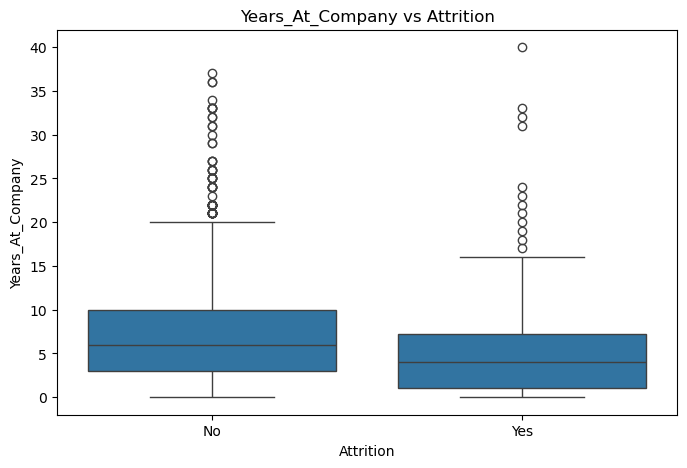

In [39]:
# 1. Years_At_Company vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_At_Company")
plt.title("Years_At_Company vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_At_Company")
plt.show()


Este gr√°fico muestra la distribuci√≥n de los a√±os que los empleados han estado en la empresa, separados por quienes se han ido (Yes) y quienes se quedaron (No).

Se observa que los empleados que se quedaron (No) tienden a tener una mediana m√°s alta en a√±os de antig√ºedad (~6 a√±os).

Los empleados que se fueron (Yes) tienen una mediana m√°s baja (~3 a√±os), y en general, menos a√±os en la empresa.

‚úÖConclusi√≥n:
La rotaci√≥n es mayor en empleados con menos a√±os en la empresa, especialmente en los primeros 3 a 5 a√±os. Esto indica que la retenci√≥n en los primeros a√±os es un desaf√≠o importante.

`A√±os en el mismo puesto`

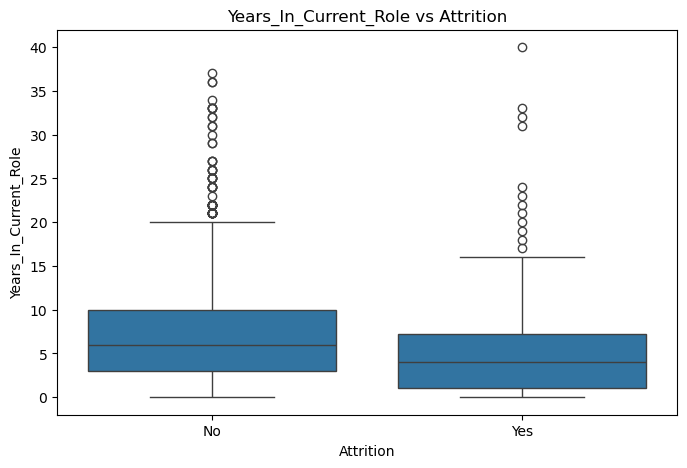

In [40]:
# 2. Years_In_Current_Role vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_At_Company")
plt.title("Years_In_Current_Role vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_In_Current_Role")
plt.show()

Descripci√≥n:
Muestra los a√±os que los empleados han estado en su rol actual, tambi√©n separados por Attrition.

La mediana de a√±os en el rol es m√°s baja para los que se fueron (~2.5 a√±os) frente a los que se quedaron (~5 a√±os).

Se nota una distribuci√≥n m√°s concentrada en valores bajos para los que se fueron.

‚úÖConclusi√≥n:
La rotaci√≥n es m√°s com√∫n entre empleados con menos tiempo en su puesto actual. Esto podr√≠a deberse a falta de adaptaci√≥n, desmotivaci√≥n temprana, o falta de oportunidades de crecimiento en ese rol.

`A√±os con el mismo jefe`

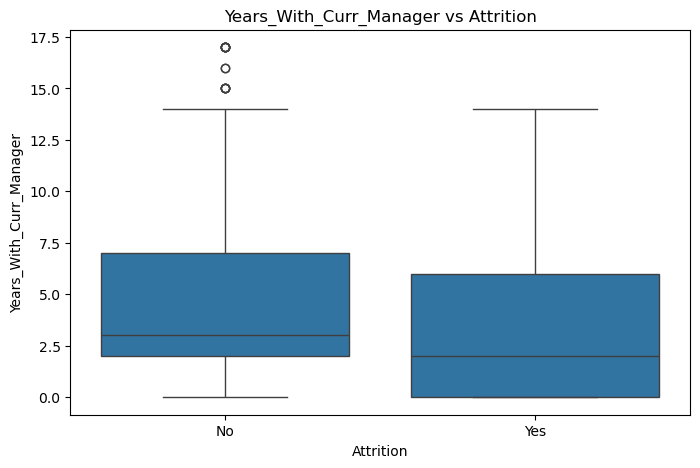

In [41]:
# 3. Years_With_Curr_Manager vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_Current_Manager")
plt.title("Years_With_Curr_Manager vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_With_Curr_Manager")
plt.show()

Descripci√≥n:
Este gr√°fico presenta cu√°ntos a√±os han estado los empleados con su jefe actual.

Los empleados que se fueron han pasado generalmente menos tiempo con su jefe (~1.5 a 2 a√±os).

Los que se quedaron tienen una mediana mayor (~3 a√±os) y una dispersi√≥n m√°s amplia.

‚úÖConclusi√≥n:
Los empleados con menos a√±os bajo el mismo manager tienden a abandonar m√°s. Esto puede reflejar relaciones d√©biles con la supervisi√≥n, falta de liderazgo eficaz, o poca confianza desarrollada.

### üí∏ Compensaci√≥n Econ√≥mica y Desarrollo Profesional

#### Salario

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2505893081.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby('Income_Group')['Attrition_Flag'].mean().reset_index()
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2505893081.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_attrition, x='Income_Group', y='Attrition_Flag', palette='YlOrRd')


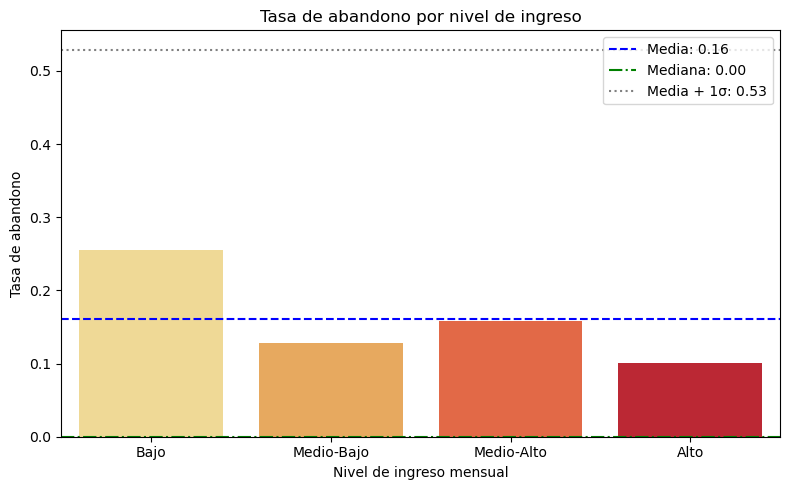

In [42]:
# Crear grupos de ingreso por cuartiles
df['Income_Group'] = pd.qcut(df['Monthly_Income'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Asegurar que Attrition_Flag es num√©rico
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

# Agrupar por Income_Group y calcular tasa de abandono
income_attrition = df.groupby('Income_Group')['Attrition_Flag'].mean().reset_index()

# C√°lculos estad√≠sticos globales (tasa general)
mean_rate = df['Attrition_Flag'].mean()
median_rate = df['Attrition_Flag'].median()
std_rate = df['Attrition_Flag'].std()

# Gr√°fico
plt.figure(figsize=(8, 5))
sns.barplot(data=income_attrition, x='Income_Group', y='Attrition_Flag', palette='YlOrRd')

# L√≠neas horizontales: media, mediana y desviaci√≥n est√°ndar (referencia)
plt.axhline(mean_rate, color='blue', linestyle='--', label=f"Media: {mean_rate:.2f}")
plt.axhline(median_rate, color='green', linestyle='-.', label=f"Mediana: {median_rate:.2f}")
plt.axhline(mean_rate + std_rate, color='gray', linestyle=':', label=f"Media + 1œÉ: {(mean_rate + std_rate):.2f}")

# Etiquetas
plt.title("Tasa de abandono por nivel de ingreso")
plt.xlabel("Nivel de ingreso mensual")
plt.ylabel("Tasa de abandono")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### ‚úÖConclusiones: Relaci√≥n entre ingresos y abandono

- El grupo con ingresos bajos presenta la mayor tasa de abandono. Es esperable por la menor compensaci√≥n.
- El grupo medio-alto muestra una tasa de abandono casi tan alta como el grupo bajo.
-> Anomal√≠a: podr√≠a deberse a estr√©s, falta de promoci√≥n o alta movilidad profesional.
- El grupo alto tiene la tasa de abandono m√°s baja, lo que refuerza la idea de que un buen salario retiene talento.


### An√°lisis de empleados con ingresos Medio-Alto y alta tasa de abandono

 1. Horas extra:
 - Filtramos por Income_Group == "Medio-Alto" y cruzamos con Over_Time vs Attrition.
 - Buscamos si el abandono est√° relacionado con la sobrecarga laboral.

 2. Tiempo sin promoci√≥n:
 - Cruzamos Years_Since_Last_Promotion vs Attrition para este grupo.
 - Evaluamos si hay sensaci√≥n de estancamiento profesional.

 3. Satisfacci√≥n laboral:
 - Cruzamos Job_Satisfaction vs Attrition para el grupo de ingreso medio-alto.
 - Analizamos si la motivaci√≥n es baja a pesar del salario.



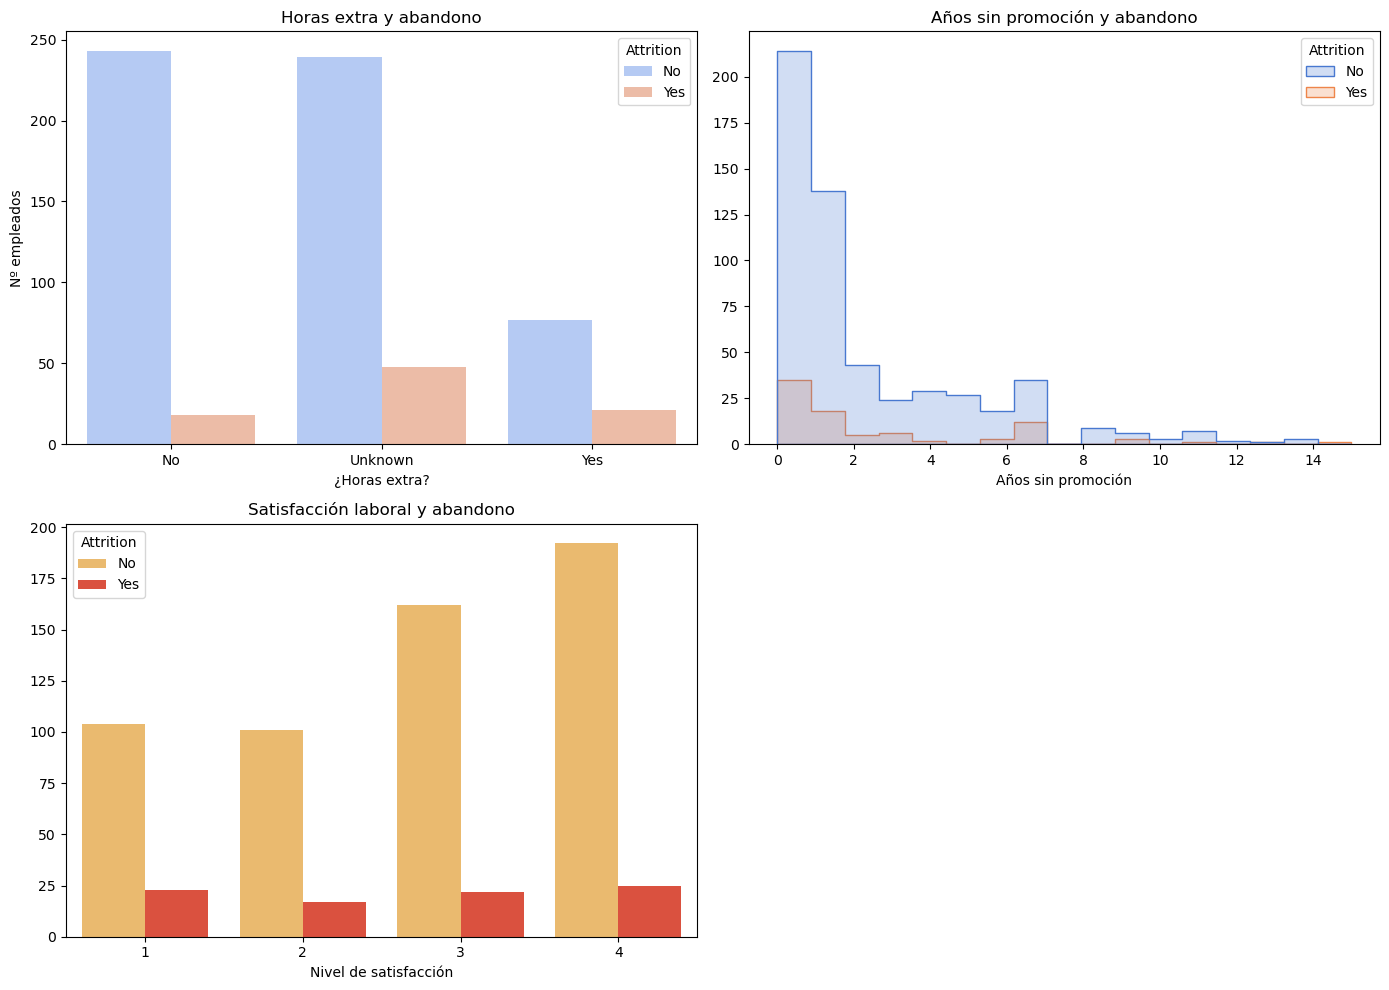

In [43]:
# Aseguramos que Income_Group existe
bins = [0, 3000, 5000, 8000, df['Monthly_Income'].max()]
labels = ['Bajo', 'Medio', 'Medio-Alto', 'Alto']
df['Income_Group'] = pd.cut(df_clean['Monthly_Income'], bins=bins, labels=labels, include_lowest=True)

# Filtramos grupo "Medio-Alto"
medio_alto = df[df['Income_Group'] == 'Medio-Alto']
# Crear figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (0, 0) Over_Time vs Attrition
sns.countplot(data=medio_alto, x='Over_Time', hue='Attrition', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Horas extra y abandono")
axes[0, 0].set_xlabel("¬øHoras extra?")
axes[0, 0].set_ylabel("N¬∫ empleados")

# (0, 1) Years_Since_Last_Promotion vs Attrition
sns.histplot(data=medio_alto, x='Years_Since_Last_Promotion', hue='Attrition',
             element='step', common_norm=False, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title("A√±os sin promoci√≥n y abandono")
axes[0, 1].set_xlabel("A√±os sin promoci√≥n")
axes[0, 1].set_ylabel("")

# (1, 0) Job_Satisfaction vs Attrition
sns.countplot(data=medio_alto, x='Job_Satisfaction', hue='Attrition', palette='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title("Satisfacci√≥n laboral y abandono")
axes[1, 0].set_xlabel("Nivel de satisfacci√≥n")
axes[1, 0].set_ylabel("")

# (1, 1) Dejar vac√≠o
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


### ‚úÖ Conclusiones de la exploraci√≥n para el grupo de ingresos medio-alto

 1. Horas extra y abandono:
 - Una parte importante de quienes se marchan hacen horas extra.
 - La sobrecarga laboral puede estar influyendo en la decisi√≥n de abandonar, incluso con buen salario.

 2. A√±os sin promoci√≥n:
 - Muchos abandonos se dan tras m√°s de 2 o 3 a√±os sin ascensos.
 - Posible estancamiento o falta de reconocimiento.

 3. Satisfacci√≥n laboral:
 - Mayor abandono en niveles bajos de satisfacci√≥n (1 y 2).
 - El salario no compensa una mala experiencia laboral.

 Interpretaci√≥n general:
 - Hay sobrecarga sin compensaci√≥n emocional ni crecimiento.
 - No perciben un camino de desarrollo dentro de la empresa.
 - No est√°n satisfechos, y eso pesa m√°s que el sueldo.

 ‚ûï Conclusi√≥n clave:
 - La retenci√≥n no depende solo del salario, sino del equilibrio entre motivaci√≥n, reconocimiento y bienestar.


#### Aumento Salarial

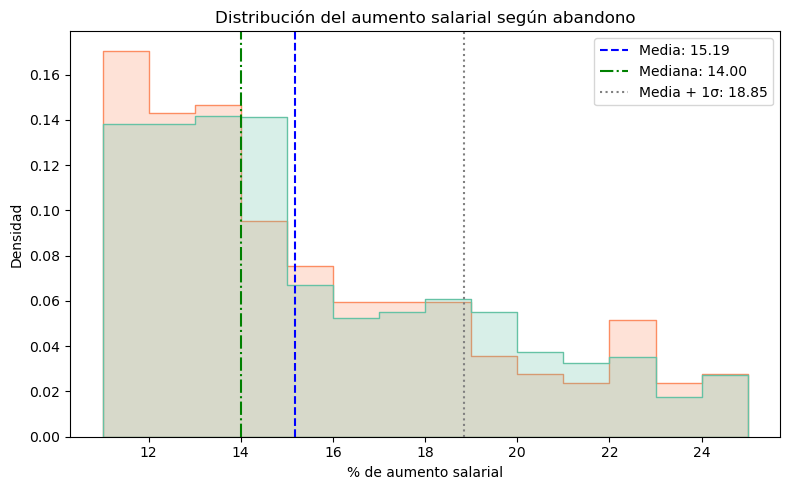

In [44]:
# C√°lculos globales para la variable analizada
mean = df['Percent_Salary_Hike'].mean()
median = df['Percent_Salary_Hike'].median()
std = df['Percent_Salary_Hike'].std()

# Histograma comparativo
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Percent_Salary_Hike', hue='Attrition',
             element='step', stat='density', common_norm=False, palette='Set2')

# L√≠neas verticales
plt.axvline(mean, color='blue', linestyle='--', label=f"Media: {mean:.2f}")
plt.axvline(median, color='green', linestyle='-.', label=f"Mediana: {median:.2f}")
plt.axvline(mean + std, color='gray', linestyle=':', label=f"Media + 1œÉ: {(mean + std):.2f}")

# Etiquetas
plt.title("Distribuci√≥n del aumento salarial seg√∫n abandono")
plt.xlabel("% de aumento salarial")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


### ‚úÖ Conclusiones sobre aumentos salariales y abandono

 - La mayor√≠a de empleados (se queden o se vayan) recibieron aumentos moderados, entre el 12% y 15%.
 - Los que permanecen muestran m√°s casos con aumentos altos (18% o m√°s).
 - Los que se van tienden a concentrarse ligeramente en los aumentos m√°s bajos (11% a 13%).

 Interpretaci√≥n:
 - Aunque la diferencia no es extrema, hay una tendencia clara.
 - Mejores aumentos se asocian con mayor retenci√≥n.
 - El aumento salarial ayuda, pero no es suficiente si no se acompa√±a de promoci√≥n, buen clima y beneficios.


#### Stock option

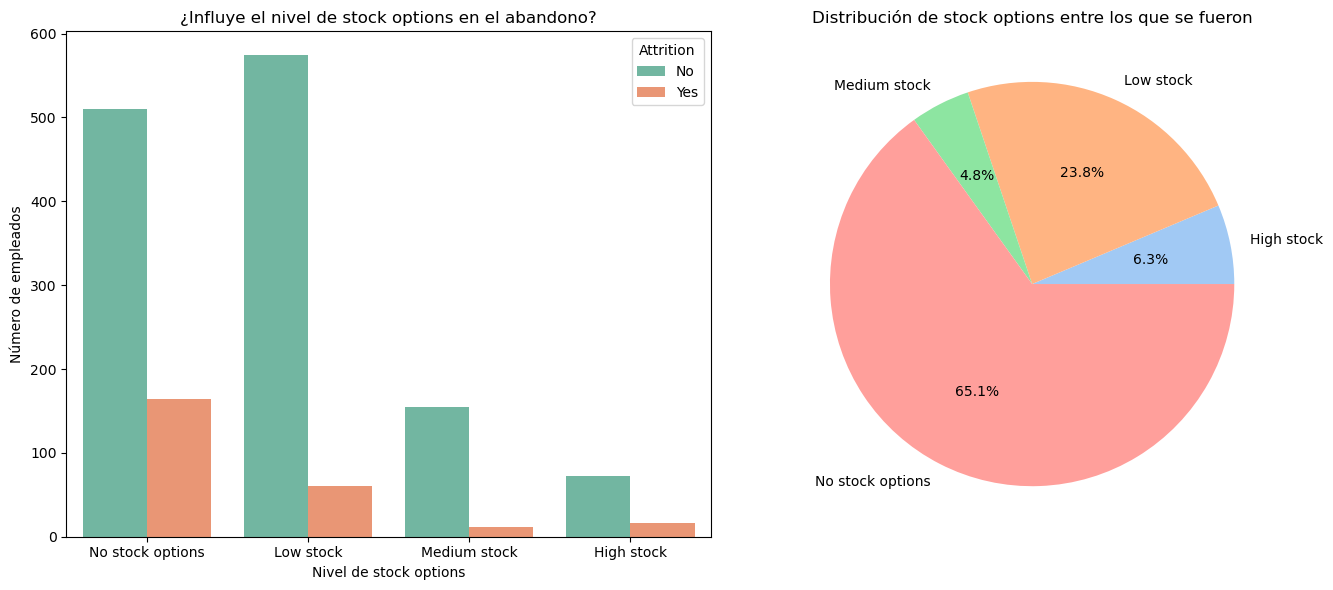

In [45]:

# Datos filtrados para el pieplot
stock_data = df[df['Attrition'] == 'Yes']['Stock_Option_Level'].value_counts().sort_index()

# Grafica de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(ax=axes[0], x='Stock_Option_Level', hue='Attrition', data=df, palette='Set2')
axes[0].set_title("¬øInfluye el nivel de stock options en el abandono?")
axes[0].set_xlabel("Nivel de stock options")
axes[0].set_ylabel("N√∫mero de empleados")

# Gr√°fico de pastel
axes[1].pie(stock_data, labels=stock_data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title("Distribuci√≥n de stock options entre los que se fueron")

plt.tight_layout()
plt.show()


### ‚úÖ Conclusiones sobre stock options y abandono

 - El abandono es m√°s alto en empleados con nivel 0 de stock options.
 - A medida que el nivel de stock options aumenta (1, 2, 3), la proporci√≥n de empleados que se quedan tambi√©n sube.
 - M√°s del 70% de los que abandonan no tienen ning√∫n tipo de participaci√≥n accionaria.

 Pistas para profundizar:
 1. ¬øQu√© perfiles tienen stock options? ¬øSon directivos o estrat√©gicos?
 2. ¬øTienen menos abandono solo por antig√ºedad, salario o promociones?
 3. ¬øSe podr√≠an ofrecer stock options a perfiles con alta rotaci√≥n como incentivo?

 Conclusi√≥n estrat√©gica:
 - Las stock options parecen tener efecto positivo en la retenci√≥n.
 - Actualmente est√°n concentradas en una minor√≠a.
 - Un plan m√°s inclusivo o progresivo podr√≠a reducir la rotaci√≥n en perfiles clave.




### üë§ Factores Demogr√°ficos y Experiencia

#### 1. ¬øLos empleados m√°s j√≥venes se marchan m√°s?

In [46]:
# Agrupamos por edad y calculamos % de empleados que se van:
attrition_by_age = df.groupby('Age')['Attrition'].value_counts(normalize=True).unstack().fillna(0) #Convierte la agrupaci√≥n en tabla donde Yes y No son columnas, para verlo mejor
tasa_abandono_edad = attrition_by_age['Yes'] * 100
tasa_abandono_edad

Age
18    50.000000
19    66.666667
20    54.545455
21    46.666667
22    31.250000
23    26.666667
24    25.925926
25    23.076923
26    30.952381
27     5.769231
28    29.411765
29    25.675676
30    14.062500
31    23.456790
32    17.187500
33    21.311475
34    12.345679
35    13.414634
36     8.450704
37    11.538462
38     3.333333
39    13.636364
40     8.620690
41    18.604651
42     4.081633
43     5.405405
44    17.647059
45     4.444444
46    16.216216
47    14.814815
48    10.526316
49     8.000000
50    16.129032
51    10.000000
52    21.052632
53    10.526316
54     0.000000
55    16.666667
56    18.750000
57     0.000000
58    35.714286
59     0.000000
60     0.000000
Name: Yes, dtype: float64

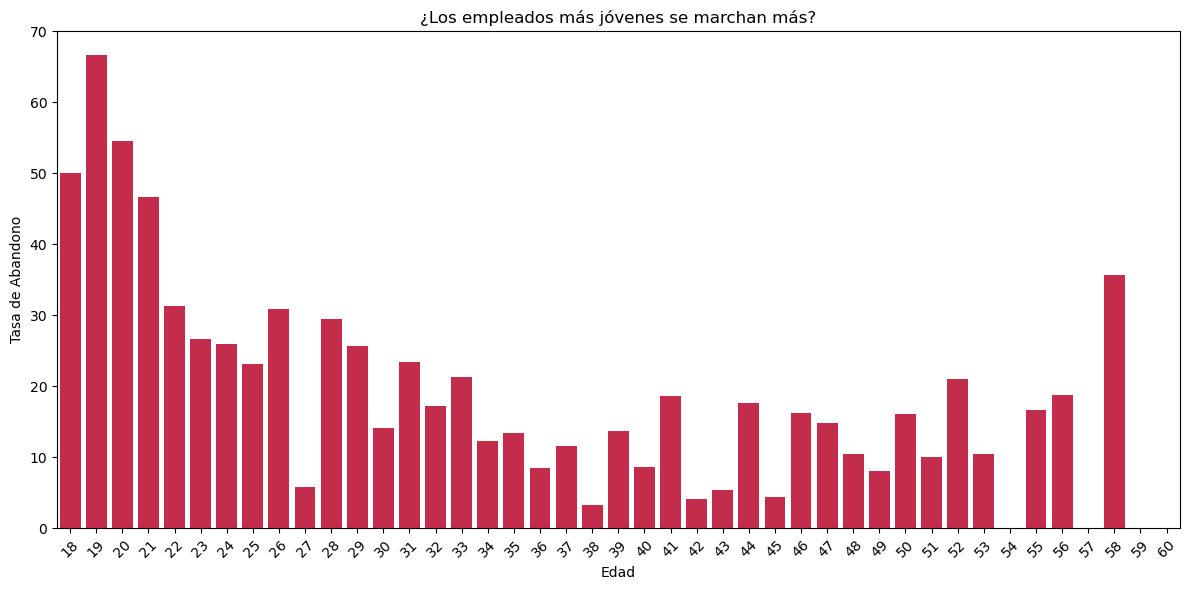

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_abandono_edad.index, y=tasa_abandono_edad.values, color='crimson')
plt.title('¬øLos empleados m√°s j√≥venes se marchan m√°s?')
plt.xlabel('Edad')
plt.ylabel('Tasa de Abandono')
plt.xticks(rotation=45)  # Rota etiquetas si hay muchas edades
plt.tight_layout()
plt.show()

#### Gr√°fica de edad pero dividiendo por generaci√≥n

In [48]:
# Funci√≥n para asignar generaci√≥n seg√∫n edad
def clasificar_generacion(edad):
    if edad <= 25:
        return 'Gen Z'
    elif 26<= edad <= 30:
        return 'Centennials'
    elif 30 <= edad <= 40:
        return 'Millennial'
    elif 40 <= edad <= 50:
        return 'Gen X'
    else:
        return 'Boomers'

# Crear columna de generaci√≥n
df['Generacion'] = df['Age'].apply(clasificar_generacion)

In [49]:
# Calcular proporci√≥n de abandono por generaci√≥n
attrition_by_gen = df.groupby('Generacion')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Extraer tasa de abandono ('Yes') en porcentaje
tasa_abandono_gen = attrition_by_gen['Yes'] * 100

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\159379037.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_gen.index, y=tasa_abandono_gen.values, palette='pastel')


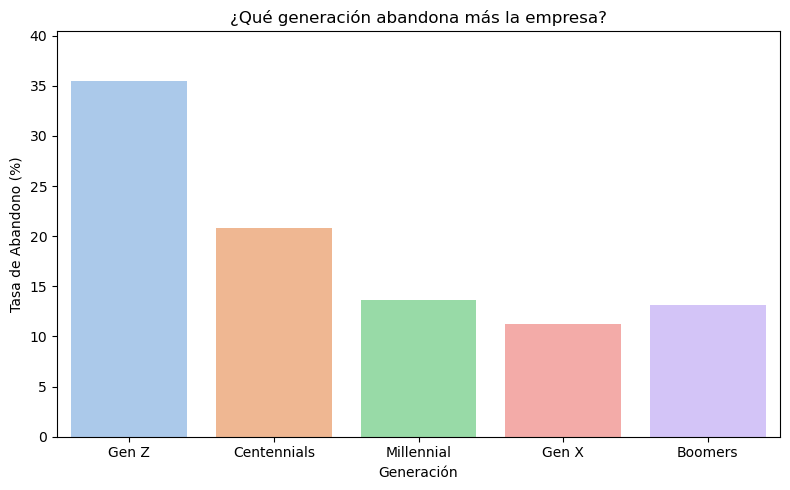

In [50]:
# Orden personalizado de generaciones
orden_gen = ['Gen Z', 'Centennials', 'Millennial', 'Gen X', 'Boomers']

# Reordenar las tasas seg√∫n el orden deseado
tasa_abandono_gen = tasa_abandono_gen.reindex(orden_gen)

# Gr√°fico
plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_abandono_gen.index, y=tasa_abandono_gen.values, palette='pastel')

plt.title('¬øQu√© generaci√≥n abandona m√°s la empresa?')
plt.xlabel('Generaci√≥n')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, tasa_abandono_gen.max() + 5)
plt.tight_layout()
plt.show()

#### 2. ¬øHay diferencias de rotaci√≥n entre g√©neros?

In [51]:
# Agrupamos por 'Gender' y contamos la proporci√≥n de 'Attrition' = 'Yes' y 'No'
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Sacamos solo la tasa de abandono (la columna 'Yes') y la multiplicamos por 100 para % (opcional)
tasa_abandono = attrition_by_gender['Yes'] * 100
tasa_abandono_genero = (tasa_abandono).round(2)
tasa_abandono_genero

Gender
Female    14.95
Male      16.90
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2041447663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_genero.index, y=tasa_abandono_genero.values, palette='mako')


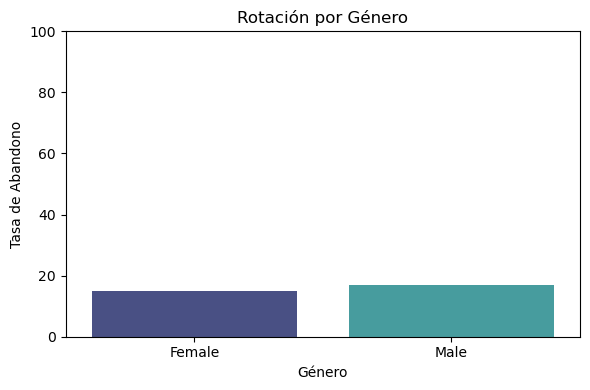

In [52]:

plt.figure(figsize=(6, 4))
sns.barplot(x=tasa_abandono_genero.index, y=tasa_abandono_genero.values, palette='mako')

plt.title('Rotaci√≥n por G√©nero')
plt.ylabel('Tasa de Abandono')
plt.xlabel('G√©nero')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#### El mismo gr√°fico pero a√±adiendo el porcentaje del 'No'

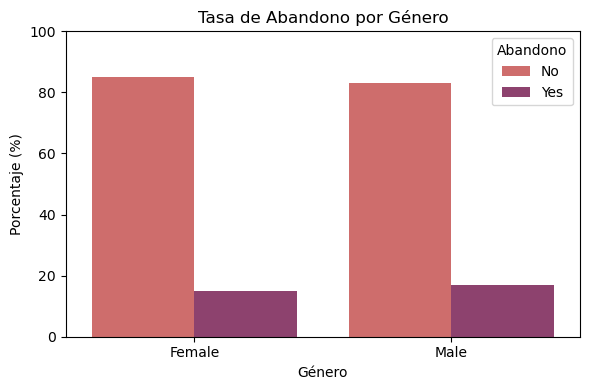

In [53]:
# Agrupar y calcular proporciones normalizadas
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Resetear √≠ndice para usar en seaborn
df_plot = attrition_by_gender.reset_index().melt(id_vars='Gender', var_name='Attrition', value_name='Proporcion')

# Convertir a porcentaje
df_plot['Proporcion'] = df_plot['Proporcion'] * 100

# Gr√°fico
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Proporcion', hue='Attrition', data=df_plot, palette='flare')

# Ajustes est√©ticos
plt.title('Tasa de Abandono por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### 3. ¬øEl estado civil influye en la rotaci√≥n?

In [54]:
# Agrupamos por 'Marital_Status' y calculamos proporci√≥n de 'Attrition' (Yes/No)
attrition_by_marital = df.groupby('Marital_Status')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Extraemos la tasa de abandono (Yes) y la convertimos a porcentaje, redondeando a 2 decimales
tasa_abandono_estado = (attrition_by_marital['Yes'] * 100).round(2)
tasa_abandono_estado

Marital_Status
Divorced     9.74
Married     13.40
Single      25.95
Unknown     14.98
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2369702483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_estado.index, y=tasa_abandono_estado.values, palette='icefire')


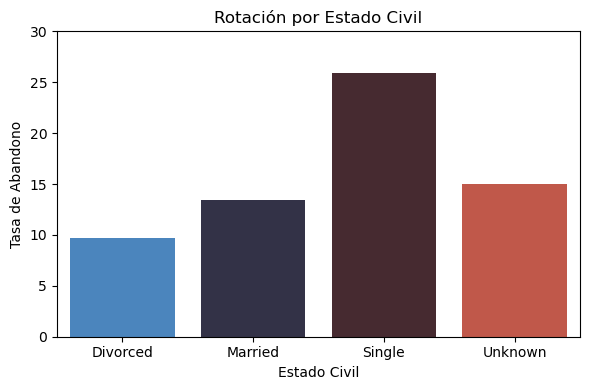

In [55]:
# Gr√°fico de barras: porcentaje de rotaci√≥n por estado civil
plt.figure(figsize=(6, 4))
sns.barplot(x=tasa_abandono_estado.index, y=tasa_abandono_estado.values, palette='icefire')

plt.title('Rotaci√≥n por Estado Civil')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Estado Civil')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

#### El mismo gr√°fico pero a√±adiendo el porcentaje del 'No'

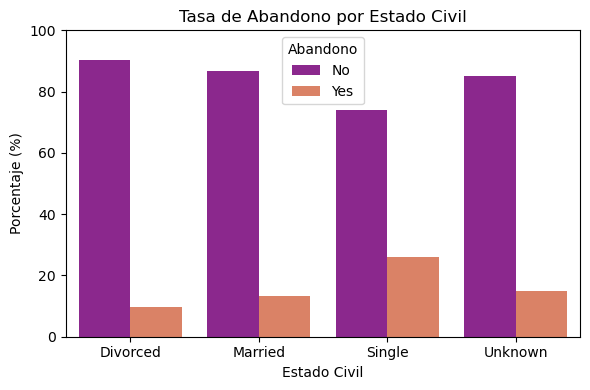

In [56]:
# Agrupar y calcular proporciones normalizadas por estado civil
attrition_by_marital = df.groupby('Marital_Status')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar DataFrame para seaborn
df_marital_plot = attrition_by_marital.reset_index().melt(id_vars='Marital_Status', 
                                                          var_name='Attrition', 
                                                          value_name='Proporcion')

# Convertir proporciones a porcentaje
df_marital_plot['Proporcion'] = df_marital_plot['Proporcion'] * 100

# Gr√°fico
plt.figure(figsize=(6, 4))
sns.barplot(x='Marital_Status', y='Proporcion', hue='Attrition', data=df_marital_plot, palette='plasma')

# Ajustes est√©ticos
plt.title('Tasa de Abandono por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### 4. ¬øLa educaci√≥n o campo de estudio influye en la retenci√≥n?

In [57]:
# Educaci√≥n
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
tasa_abandono_edu = (attrition_by_education['Yes'] * 100).round(2)
tasa_abandono_edu

Education
Bachelor Degree    14.88
Postgraduate        9.43
Primary            18.64
Secundary          15.28
Upper Secundary    17.28
Name: Yes, dtype: float64

In [58]:
# Campo de estudio
attrition_by_field = df.groupby('Education_Field')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
tasa_abandono_campo = (attrition_by_field['Yes'] * 100).round(2)
tasa_abandono_campo

Education_Field
Human Resources     16.67
Life Sciences       13.35
Marketing           21.21
Medical             16.48
Other               12.73
Technical Degree    23.88
Unknown             16.12
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1466458124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_edu.index, y=tasa_abandono_edu.values, palette='magma' )


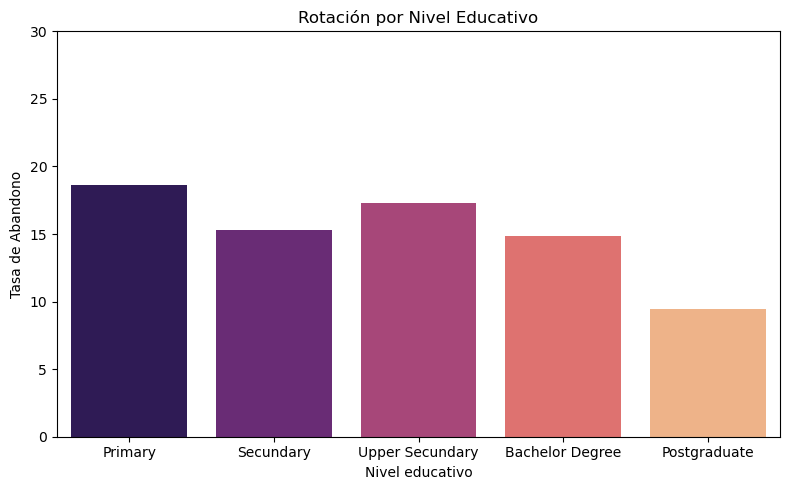

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1466458124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_campo.index, y=tasa_abandono_campo.values, palette='viridis')


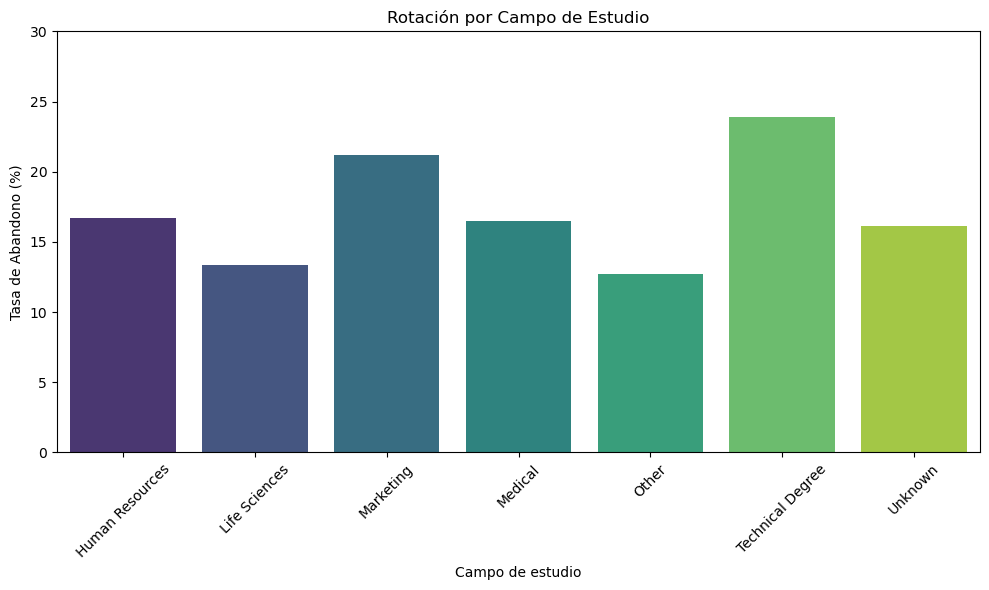

In [59]:
# Educaci√≥n
orden_educacion = ['Primary','Secundary','Upper Secundary', 'Bachelor Degree', 'Postgraduate']
# Reordenar Series
tasa_abandono_edu = tasa_abandono_edu.reindex(orden_educacion)

plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_abandono_edu.index, y=tasa_abandono_edu.values, palette='magma' )

plt.title('Rotaci√≥n por Nivel Educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de Abandono')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

# Campo de estudio
plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_abandono_campo.index, y=tasa_abandono_campo.values, palette='viridis')

plt.title('Rotaci√≥n por Campo de Estudio')
plt.xlabel('Campo de estudio')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

#### Los mismos gr√°ficos pero a√±adiendo el porcentaje del 'No'

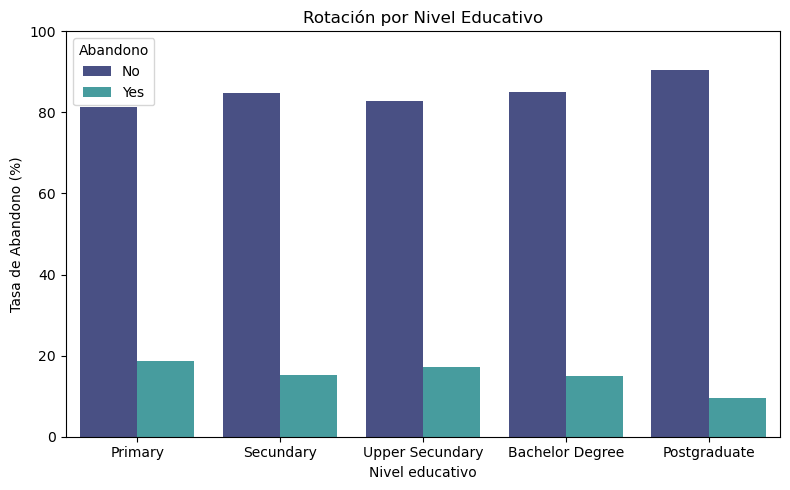

In [60]:
# Educaci√≥n:
# Orden correcto de nivel educativo (1 = Menos educaci√≥n, 5 = M√°s educaci√≥n)
orden_educacion = ['Primary','Secundary','Upper Secundary', 'Bachelor Degree', 'Postgraduate']

# Agrupar por nivel educativo y normalizar
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar datos para seaborn
df_edu_plot = attrition_by_education.reset_index().melt(id_vars='Education', 
                                                        var_name='Attrition', 
                                                        value_name='Proporcion')
df_edu_plot['Proporcion'] = df_edu_plot['Proporcion'] * 100

# Ordenar niveles educativos
df_edu_plot['Education'] = pd.Categorical(df_edu_plot['Education'], categories=orden_educacion, ordered=True)
df_edu_plot = df_edu_plot.sort_values('Education')

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Proporcion', hue='Attrition', data=df_edu_plot, palette='mako')

plt.title('Rotaci√≥n por Nivel Educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

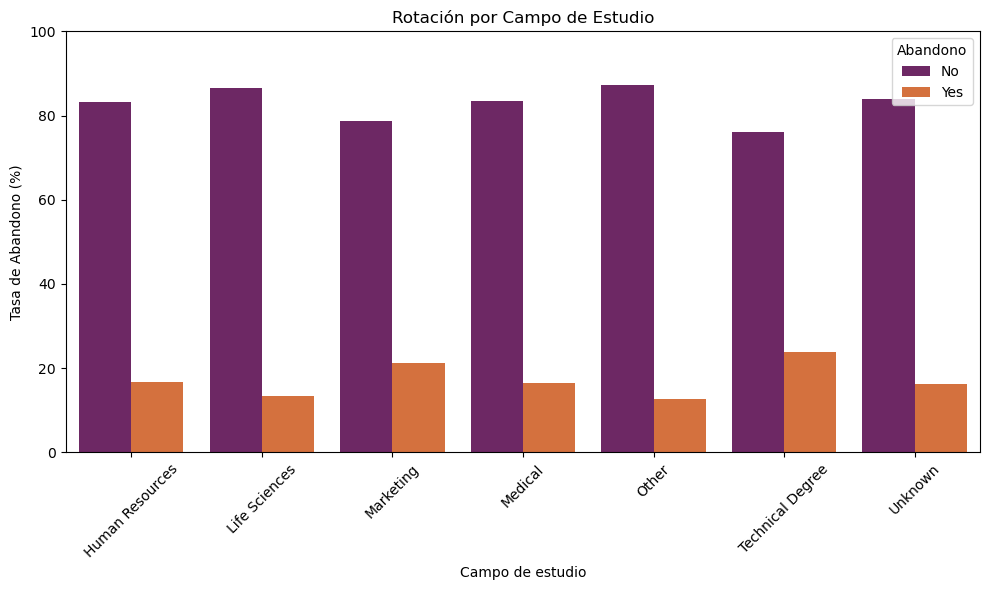

In [61]:
# Campo de estudio:
# Agrupaci√≥n y transformaci√≥n
attrition_by_field = df.groupby('Education_Field')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar para seaborn
df_field_plot = attrition_by_field.reset_index().melt(id_vars='Education_Field', 
                                                      var_name='Attrition', 
                                                      value_name='Proporcion')
df_field_plot['Proporcion'] = df_field_plot['Proporcion'] * 100

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Field', y='Proporcion', hue='Attrition', data=df_field_plot, palette='inferno')

plt.title('Rotaci√≥n por Campo de Estudio')
plt.xlabel('Campo de estudio')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### Conclusiones:

üìä 1. Rotaci√≥n por Edad

    - La tasa de abandono disminuye progresivamente con la edad.

    - Los empleados m√°s j√≥venes (20-30 a√±os) presentan una tasa de rotaci√≥n significativamente m√°s alta.

    - Esto puede reflejar una mayor b√∫squeda de oportunidades, menor estabilidad laboral o insatisfacci√≥n temprana en sus carreras.

üë• 2. Rotaci√≥n por Generaci√≥n

    - Gen Z y Centennials tienen las tasas de abandono m√°s elevadas.

    - En cambio, Gen X y Boomers muestran mayor permanencia.

    - Esto confirma la tendencia de que las generaciones m√°s j√≥venes cambian de trabajo con m√°s frecuencia, posiblemente buscando mejores condiciones o desarrollo profesional m√°s r√°pido.

‚ößÔ∏è 3. Rotaci√≥n por G√©nero

    - Las tasas de abandono entre hombres y mujeres son relativamente similares, con una leve variaci√≥n que puede no ser estad√≠sticamente significativa.

    - No se observa una diferencia clara de rotaci√≥n que se pueda atribuir directamente al g√©nero.

üíç 4. Rotaci√≥n por Estado Civil

    - Las personas solteras muestran una tasa de rotaci√≥n m√°s alta en comparaci√≥n con personas casadas o divorciadas.

    - Esto puede sugerir que los empleados con responsabilidades familiares tienden a priorizar la estabilidad laboral.

    - Tambi√©n podr√≠a indicar que los solteros tienen m√°s flexibilidad para cambiar de trabajo o tomar riesgos laborales.

    - Tner en cuenta la edad (son la mayoria de solteros)

üéì 5. Rotaci√≥n por Nivel Educativo

    - La tasa de abandono disminuye ligeramente a medida que aumenta el nivel educativo.

    - Empleados con educaci√≥n b√°sica (Primary, Secondary) tienden a abandonar m√°s que quienes tienen t√≠tulos de Bachelor o Postgrado.

    - Esto puede reflejar una mejor adecuaci√≥n de expectativas y oportunidades para los m√°s calificados, o un mayor compromiso con la empresa.

üß™ 6. Rotaci√≥n por Campo de Estudio

    - Algunos campos de estudio presentan mayores tasas de rotaci√≥n, como por ejemplo MK o Technical Degree (dependiendo del dataset).

    - Otros campos, como Medical o Life Sciences, muestran tasas de abandono m√°s bajas.

    - Esto puede deberse a diferencias en las oportunidades de carrera, satisfacci√≥n laboral o rotaci√≥n t√≠pica en cada sector profesional.

#### `Antig√ºedad`

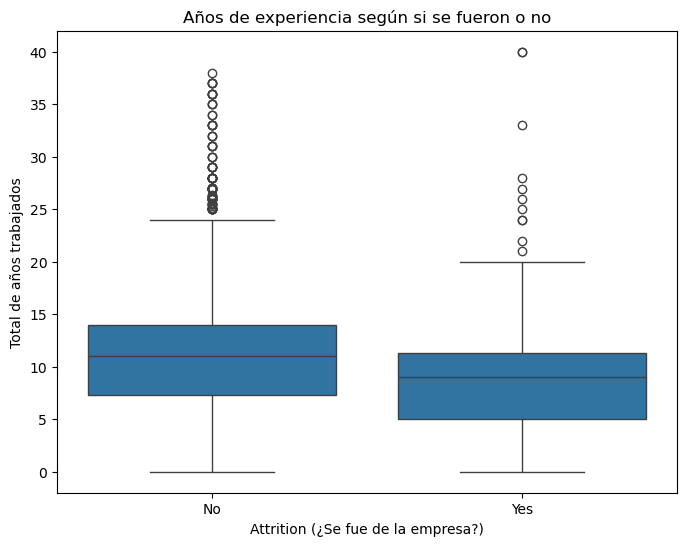

In [62]:
#2. ¬øLa experiencia total (Total_Working_Years) afecta a la decisi√≥n?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Total_Working_Years', data=df)
plt.title('A√±os de experiencia seg√∫n si se fueron o no')
plt.xlabel('Attrition (¬øSe fue de la empresa?)')
plt.ylabel('Total de a√±os trabajados')
plt.show()

#PREGUNTAR SI EN ESOS A√ëOS PRIMEROS DECISIVOS, HAY POSIBILIDAD DE PROMOCION O NO O SUBIDA DE SULADO O NO

 A√±os de Experiencia y Decisi√≥n de Permanencia
Este diagrama de caja compara la distribuci√≥n de a√±os de experiencia entre empleados que se quedaron en la empresa (Attrition: No) y aquellos que decidieron irse (Attrition: Yes).

Empleados que se quedaron:
La mayor√≠a presenta entre 7 y 14 a√±os de experiencia, con una mediana cercana a los 11-12 a√±os. Se observan numerosos valores at√≠picos que representan empleados con m√°s de 40 a√±os de experiencia, lo que sugiere que quienes tienen una trayectoria larga tienden a permanecer en la organizaci√≥n.

Empleados que se fueron:
La experiencia de este grupo se concentra entre 5 y 11 a√±os, con una mediana alrededor de 8-9 a√±os, ligeramente inferior a la del grupo que permaneci√≥. Aunque hay algunos casos de alta experiencia, son menos frecuentes.

Conclusi√≥n: Los empleados con m√°s a√±os de experiencia parecen mostrar mayor retenci√≥n. Las salidas se concentran principalmente entre quienes tienen una experiencia intermedia o moderada.

## 5. OTRAS CONSULTAS MENOS RELEVANTES

#### Formaci√≥n en los √∫ltimos a√±os

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3351802212.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_form = df.groupby(['Education', 'Attrition'])['Training_Times_Last_Year'].mean().reset_index()


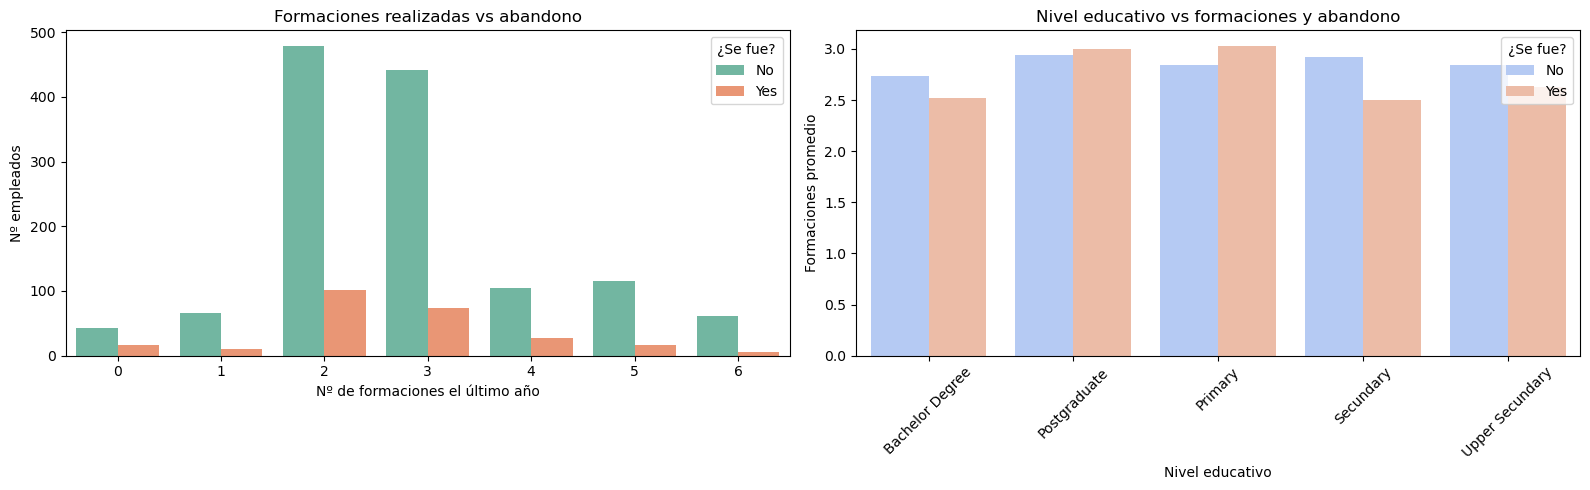

In [63]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1Gr√°fico principal: Formaciones vs Abandono
sns.countplot(data=df, x='Training_Times_Last_Year', hue='Attrition',
              palette='Set2', ax=axes[0])
axes[0].set_title("Formaciones realizadas vs abandono")
axes[0].set_xlabel("N¬∫ de formaciones el √∫ltimo a√±o")
axes[0].set_ylabel("N¬∫ empleados")
axes[0].legend(title="¬øSe fue?")


# 2Gr√°fico alternativo: Formaci√≥n promedio por educaci√≥n y abandono
# Agrupar por nivel educativo y abandono, y calcular media de formaciones
edu_form = df.groupby(['Education', 'Attrition'])['Training_Times_Last_Year'].mean().reset_index()

# Gr√°fico de barras con formaci√≥n promedio
sns.barplot(data=edu_form, x='Education', y='Training_Times_Last_Year', hue='Attrition',
            palette='coolwarm', ax=axes[1])
axes[1].set_title("Nivel educativo vs formaciones y abandono")
axes[1].set_xlabel("Nivel educativo")
axes[1].set_ylabel("Formaciones promedio")
axes[1].legend(title="¬øSe fue?")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar dise√±o
plt.tight_layout()
plt.show()

### ‚úÖ Conclusiones sobre formaci√≥n y abandono

 1. La mayor√≠a de abandonos se concentran en empleados con 0 o 1 formaci√≥n al a√±o.
    ‚Üí La falta de desarrollo profesional est√° claramente asociada a la rotaci√≥n.

 2. Quienes reciben 2 o 3 formaciones muestran mayor estabilidad.
    ‚Üí La formaci√≥n continua es un buen mecanismo de retenci√≥n.

 3. En niveles de 5-6 formaciones hay algunos abandonos, aunque son casos menos representativos.
    ‚Üí Podr√≠an deberse a saturaci√≥n, reestructuraciones u otros factores.

 üîç An√°lisis cruzado con Education:
 - Empleados con menor nivel educativo (1 y 2) reciben menos formaci√≥n, y adem√°s abandonan m√°s si no se forman.
 - A mayor nivel educativo, hay m√°s formaci√≥n y menor rotaci√≥n, incluso con menos formaci√≥n interna.
 - El capital formativo previo puede amortiguar la frust


#### Tiempo sin promoci√≥n 

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Job_Level', y='Years_Since_Last_Promotion', ci='sd', ax=axes[0])
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',


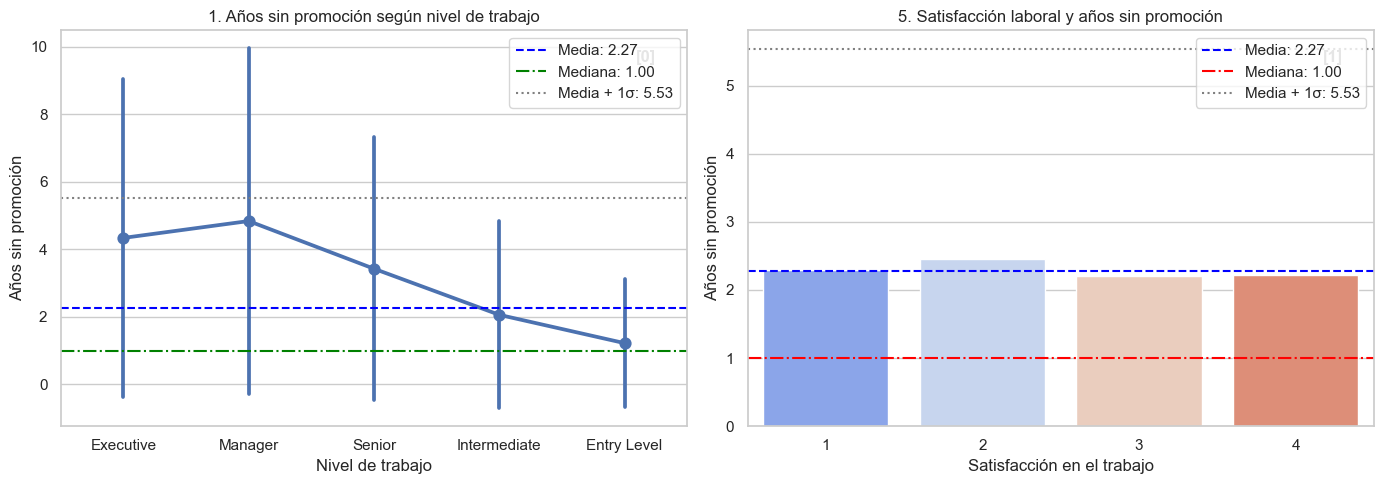

In [67]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()
# Estad√≠sticas generales de Years_Since_Last_Promotion
mean_val = df['Years_Since_Last_Promotion'].mean()
median_val = df['Years_Since_Last_Promotion'].median()
std_val = df['Years_Since_Last_Promotion'].std()
# 1Ô∏èNivel de trabajo vs a√±os sin promoci√≥n (con desviaci√≥n est√°ndar)
sns.pointplot(data=df, x='Job_Level', y='Years_Since_Last_Promotion', ci='sd', ax=axes[0])
axes[0].axhline(mean_val, color='blue', linestyle='--', label=f'Media: {mean_val:.2f}')
axes[0].axhline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.2f}')
axes[0].axhline(mean_val + std_val, color='gray', linestyle=':', label=f'Media + 1œÉ: {(mean_val + std_val):.2f}')
axes[0].set_title("1. A√±os sin promoci√≥n seg√∫n nivel de trabajo")
axes[0].set_xlabel("Nivel de trabajo")
axes[0].set_ylabel("A√±os sin promoci√≥n")
axes[0].legend(loc='upper right')
axes[0].text(0.95, 0.95, '[0]', transform=axes[0].transAxes,
             fontsize=12, fontweight='bold', color='gray', ha='right', va='top')
# 2Ô∏èSatisfacci√≥n laboral vs a√±os sin promoci√≥n (sin l√≠neas negras)
sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',
            ci=None, palette='coolwarm', ax=axes[1])
axes[1].axhline(mean_val, color='blue', linestyle='--', label=f'Media: {mean_val:.2f}')
axes[1].axhline(median_val, color='red', linestyle='-.', label=f'Mediana: {median_val:.2f}')
axes[1].axhline(mean_val + std_val, color='gray', linestyle=':', label=f'Media + 1œÉ: {(mean_val + std_val):.2f}')
axes[1].set_title("5. Satisfacci√≥n laboral y a√±os sin promoci√≥n")
axes[1].set_xlabel("Satisfacci√≥n en el trabajo")
axes[1].set_ylabel("A√±os sin promoci√≥n")
axes[1].legend(loc='upper right')
axes[1].text(0.95, 0.95, '[1]', transform=axes[1].transAxes,
             fontsize=12, fontweight='bold', color='gray', ha='right', va='top')
plt.tight_layout()
plt.show()

‚úÖ Conclusiones

1. Estancamiento en niveles bajos

La primera gr√°fica muestra que los empleados de **niveles jer√°rquicos bajos** acumulan m√°s a√±os sin promoci√≥n. Esta situaci√≥n genera una percepci√≥n clara de **estancamiento estructural**, lo que puede derivar en frustraci√≥n y deseo de abandono. Este patr√≥n se conecta directamente con el hallazgo de que **los empleados con antig√ºedad y sin crecimiento profesional tienden a irse**.

2. Estancamiento = insatisfacci√≥n

La segunda gr√°fica revela una relaci√≥n directa entre **a√±os sin promoci√≥n y baja satisfacci√≥n laboral**. Es decir, a medida que un empleado pasa m√°s tiempo sin reconocimiento o ascenso, su nivel de satisfacci√≥n cae, aumentando as√≠ el **riesgo de rotaci√≥n**.



üß© Conclusi√≥n integradora del estudio

Tu investigaci√≥n demuestra que el abandono laboral no es un fen√≥meno aleatorio, sino **una consecuencia acumulativa de estancamiento, baja satisfacci√≥n y falta de desarrollo**. La falta de promoci√≥n aparece como una **variable central**, que adem√°s se entrelaza con:

* **El nivel de trabajo (m√°s abandono en niveles bajos sin promoci√≥n)**
* **La implicaci√≥n laboral (no siempre recompensada)**
* **La antig√ºedad (cuanto m√°s tiempo sin promoci√≥n, m√°s riesgo de abandono)**
* **La ausencia de formaci√≥n (sin formaci√≥n = sin evoluci√≥n)**

> En resumen: **la falta de crecimiento profesional es el principal motor silencioso del abandono**, especialmente cuando se acumula con desmotivaci√≥n, poca formaci√≥n o implicaci√≥n no reconocida.

#### Stock_Option_Level vs Job_Level

Este gr√°fico muestra cu√°ntos empleados de cada **nivel de trabajo** (Entry, Intermediate, Senior, Manager, Executive) tienen acceso a distintos **niveles de stock options** (0, 1, 2 o 3).

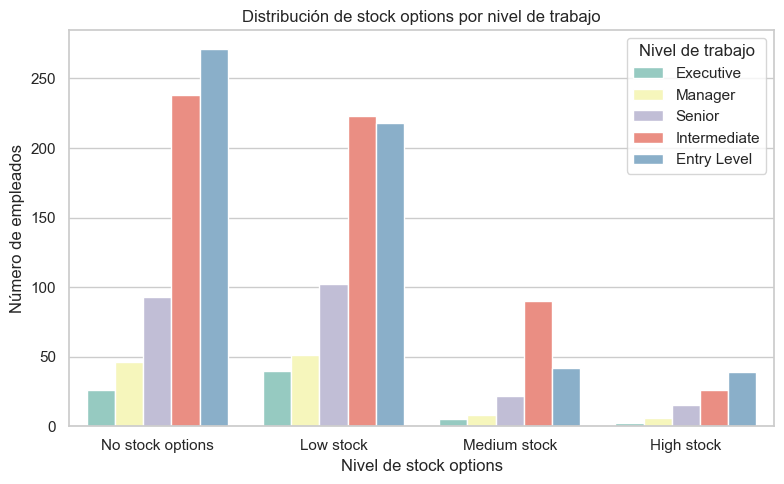

In [65]:
# Gr√°fico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stock_Option_Level', hue='Job_Level', palette='Set3')
plt.title("Distribuci√≥n de stock options por nivel de trabajo")
plt.xlabel("Nivel de stock options")
plt.ylabel("N√∫mero de empleados")
plt.legend(title="Nivel de trabajo", loc='upper right')
plt.tight_layout()
plt.show()


### ‚úÖ Conclusiones sobre stock options y nivel laboral

 1. El nivel 0 de stock options est√° presente en todos los niveles, pero predomina en Entry Level e Intermediate.
    ‚Üí La mayor√≠a de empleados no recibe incentivos accionarios, especialmente los que est√°n empezando.

 2. Los niveles 2 y 3 de stock options se concentran en empleados Senior, Managers y Executives.
    ‚Üí Reflejan incentivos financieros ligados a permanencia estrat√©gica y toma de decisiones.

 3. Pr√°cticamente no hay Managers ni Executives sin stock options (nivel 0).
    ‚Üí Estos beneficios son parte del paquete est√°ndar en puestos directivos.

 4. Muchos empleados Senior est√°n en nivel 0.
    ‚Üí Puede ser un foco de frustraci√≥n o fuga si no se les compensa por otras v√≠as (salario, promoci√≥n, formaci√≥n).
    ‚Üí Zona de riesgo silenciosa: experiencia sin reconocimiento a largo plazo.



## 5 ¬øSe van m√°s los empleados con alta formaci√≥n y bajo salario?

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3592867324.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tasa_infravalorados,


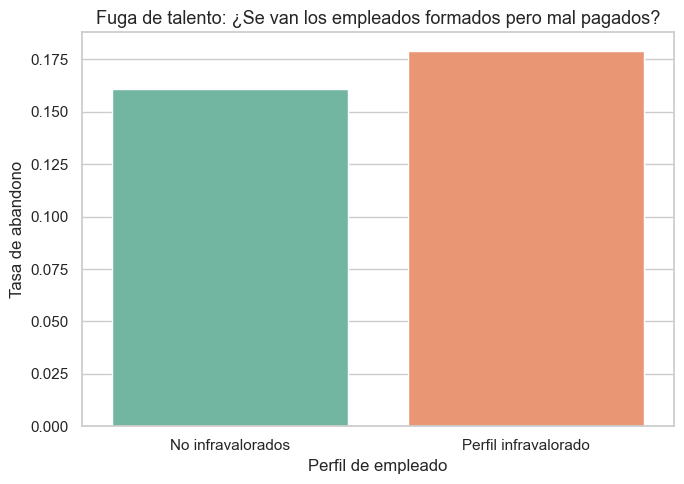

In [66]:

# Paso 1: Mapear educaci√≥n a n√∫mero
education_map = {
    'Primary': 1,
    'Secondary': 2,
    'Upper Secundary': 3,
    'Bachelor Degree': 4,
    'Postgraduate': 5
}
df['Education_Level'] = df['Education'].map(education_map)

# Paso 2: Eliminar posibles nulos
df = df[df['Education_Level'].notna() & df['Monthly_Income'].notna()]

# Paso 3: Crear columna 'Perfil_Infravalorado' como tipo booleano expl√≠cito
salario_threshold = df['Monthly_Income'].quantile(0.4)
df['Perfil_Infravalorado'] = (
    (df['Education_Level'] >= 4) & 
    (df['Monthly_Income'] < salario_threshold)
).astype(bool)

# Paso 5: Agrupar y calcular tasa
df['Perfil_Infravalorado'] = df['Perfil_Infravalorado'].astype(str)  # üëà Evitamos tipo "category"
tasa_infravalorados = df.groupby('Perfil_Infravalorado')['Attrition_Flag'].mean().reset_index()

# Paso 6: Etiquetas amigables
tasa_infravalorados['Perfil_Infravalorado'] = tasa_infravalorados['Perfil_Infravalorado'].map({
    'False': 'No infravalorados',
    'True': 'Perfil infravalorado'
})

# Paso 7: Gr√°fico
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.barplot(data=tasa_infravalorados,
            x='Perfil_Infravalorado',
            y='Attrition_Flag',
            palette='Set2')

plt.title("Fuga de talento: ¬øSe van los empleados formados pero mal pagados?", fontsize=13)
plt.xlabel("Perfil de empleado", fontsize=12)
plt.ylabel("Tasa de abandono", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### ‚úÖ Conclusiones sobre el perfil infravalorado

 1. Mayor abandono en empleados infravalorados:
 - Abandonan m√°s que los no infravalorados (~18% vs ~16%).
 - Bien formados pero mal pagados = mayor riesgo de fuga.
 - El problema es la incoherencia entre formaci√≥n y salario.

 2. La percepci√≥n de injusticia influye m√°s que los datos objetivos:
 - Sentirse mal recompensado genera desconexi√≥n emocional.
 - Puede derivar en estr√©s cr√≥nico y desmotivaci√≥n.

 3. Se pierde talento valioso:
 - Los perfiles que se van ya est√°n formados y son atractivos fuera.
 - La empresa pierde capital humano y su inversi√≥n en desarrollo.

